<h2 align="center"> SINGLE CELLS: </h2>
<h3 align="center"> UMA ANÁLISE DOS TIPOS DE CÉLULA PRESENTES NO INTESTINO  </h3>

<hr>

<p> O intestino é um órgão complexo que promove a digestão, extrai nutrientes, participa na vigilância imunológica, mantém relações simbióticas críticas com a microbiota e afeta a saúde geral. Entender este órgão promove uma melhor analise do comportamento e interação das células que o constituem, entretanto, métodos clássicos de expressão gênica não analisam as interações respeitando o comportamento heterogênico destas, desse modo, a expressão gênica unicelular (scRNA-seq) nos permite uma analise única para determinação do estado, função e resposta celular das células em nível unicelular para mais de milhões de células em um único estudo, permitindo a classificação, distinção e caracterização de cada célula ao nível do transcriptoma. O objetivo deste trabalho é realizar o tratamento de dados do intestino aplicando técnicas de Machine Learning com o datase do Tabula Sapiens.  </p>


<p> O projeto foi elaborado pelos estudantes durante o quarto semestre de graduação da Ilum - Escola de Ciência, para a disciplina de Biomatmática. O grupo é composto pelos estudantes: </p>

<p> 1. Caio Eduardo Palatin  </p>
<p> 2. João Pedro Aroucha de Brito  </p>
<p> 3. Monyque Karoline de Paula Silva </p>
<p align="justify">

<h3 align="="> TRATAMENTO INICIAL DOS DADOS  </h3>


#### Imports

In [1]:
#Importação das bibliotecas
import anndata as ad
import scanpy as sc
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import random

import matplotlib.pyplot as plt
import matplotlib

from collections import defaultdict
from statistics import mode

#### Leitura de dados

In [2]:
# Leitura do primeiro arquivo .h5ad
adata = sc.read_h5ad('large.h5ad')

# Leitura do segundo arquivo .h5ad
adatinha = sc.read_h5ad('small.h5ad')

# Analisa a compatibilidade da estrutura dos dois datasets e se forem compatíveis, realizar o merge com o comando 'concat'
if adata.shape[1] == adatinha.shape[1]:
    merged_adata = ad.concat([adata, adatinha], merge='unique')
else:
    print("The AnnData objects have incompatible shapes and cannot be merged.")

#### Filtragem de células

In [3]:
# Filtragem de células dentro dos dados
def filterCells(ann, nGenes, nCells):
    sc.pp.filter_cells(ann, min_genes=nGenes) # Retirando células com menos de (nGenes) genes
    sc.pp.filter_genes(ann, min_cells=nCells) # Retirando genes que aparecem em menos de (nCells) células

In [4]:
filterCells(adata, 200, 3)
filterCells(adatinha, 200, 3)
filterCells(merged_adata, 200, 3)

#### Mostrando os dados

In [5]:
# Intestino Delgado
display(adata)
print()

# Intestino Grosso
display(adatinha)
print()

# União dos datas - sem a expressão gênica (ela não conseguiu ser acoplada)
display(merged_adata)

AnnData object with n_obs × n_vars = 13680 × 35441
    obs: 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'ensembl_version', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    uns: '_scvi', '_training_mode', 'assay_colors', 'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_predi

AnnData object with n_obs × n_vars = 12467 × 36075
    obs: 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'ensembl_version', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    uns: '_scvi', '_training_mode', 'assay_colors', 'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_predi

AnnData object with n_obs × n_vars = 26147 × 42949
    obs: 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'ensembl_version', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'

<h3 align="="> PCA - CAIO  </h3>
<p> O PCA, ou Análise de Componentes Principais, é uma técnica de redução de dimensão que visa simplificar a complexidade de conjuntos de dados de alta dimensão. Ela funciona encontrando combinações lineares das variáveis originais para criar novas variáveis, chamadas de componentes principais, que capturam a maior parte da variabilidade dos dados. Esses componentes principais são ordenados por sua importância, de modo que o primeiro componente principal captura a maior variabilidade, o segundo o segundo maior, e assim por diante. O PCA é uma técnica linear e assume que as relações entre as variáveis são lineares.<p>
<p> Sendo extremamente útil na análise de dados biológicos, especialmente em conjuntos de dados de single-cell devido à sua alta dimensionalidade. Com a capacidade de reduzir a complexidade desses dados enquanto mantém informações essenciais, o PCA torna possível visualizar e interpretar padrões biológicos em células individuais de uma maneira mais acessível.<p>

In [6]:
def pcaAnn(ann, name, projection='2d', color='cell_type'):
    sc.pl.pca(ann, projection=projection, color=color, show=False)
    plt.gcf().suptitle(name)

/home/ABTLUS/joao220047/anaconda3/envs/BM/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ABTLUS/joao220047/anaconda3/envs/BM/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ABTLUS/joao220047/anaconda3/envs/BM/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


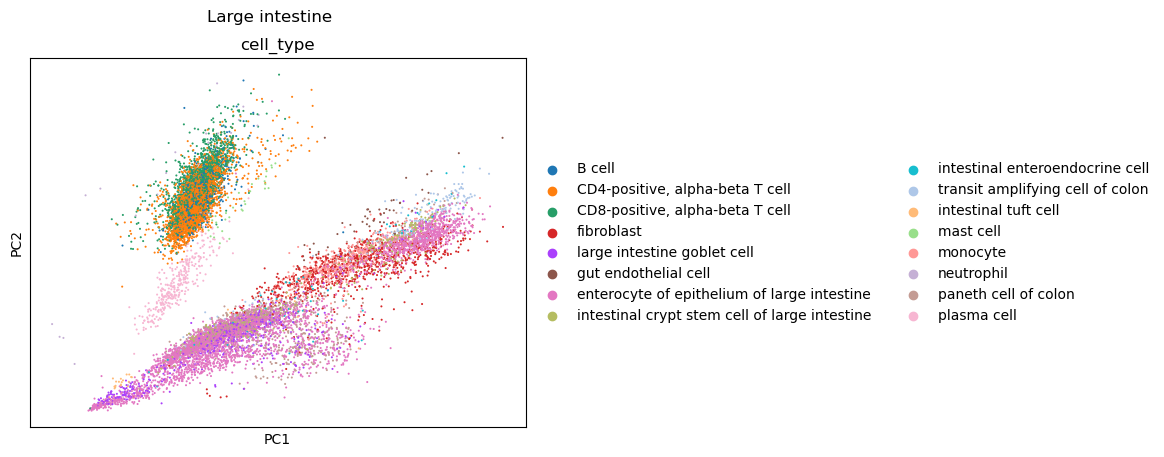

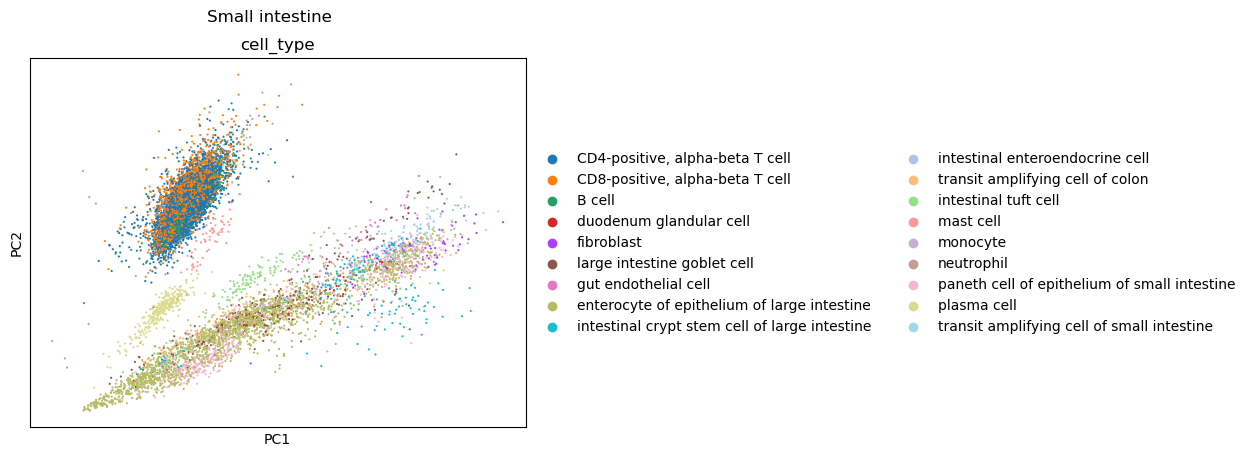

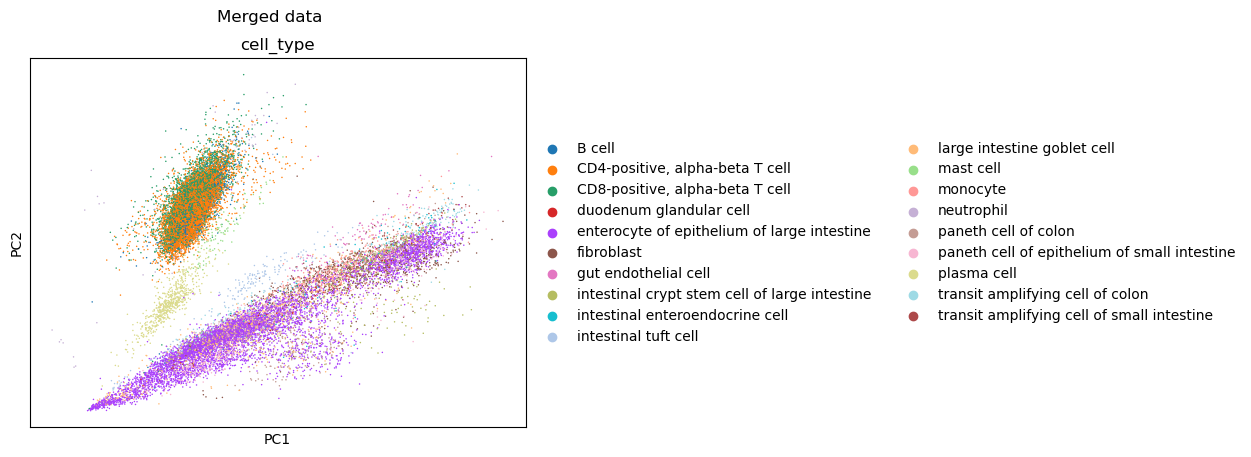

In [7]:
pcaAnn(adata, 'Large intestine')
pcaAnn(adatinha, 'Small intestine')
pcaAnn(merged_adata, 'Merged data')

<h3 align="="> UMAP  </h3>
<p> O UMAP é uma técnica de redução de dimensão que pode ser usada para visualização de forma semelhante ao t-SNE (ferramenta para visualizar dados de alta dimensão que converte semelhanças entre pontos de dados em probabilidades conjuntas e tenta minimizar a divergência de Kullback-Leibler entre as probabilidades conjuntas da incorporação de baixa dimensão e dos dados de alta dimensão), mas também para redução geral de dimensão não linear.  </p>
<p> Ele é muito utilizado em dados de single-cell devido a alta dimensionalidade por possuir milhares de contagem de expressão gênica por célula individual e conseguir reduzi-las a duas ou três dimensões para que cada célula obtenha uma localização em um gráfico bi ou tridimensional. </p>
<p> De acordo com o próprio UMAP, "Os conjuntos de dados de sequenciamento de RNA unicelular são tão vastos e multidimensionais que, como pesquisador, você não pode simplesmente tentar encontrar um padrão biologicamente significativo lendo seus milhões de pontos de dados. O UMAP foi projetado para ajudar a visualizar as informações para que você possa ver e exibir padrões em seus dados com mais facilidade. Dessa forma, os pontos que formam clusters em um gráfico UMAP podem ser potencialmente interpretados como (sub)tipos de células separadas". </p>


In [8]:
def umapAnn(ann, name, color='cell_type'):
    sc.pl.umap(ann, color=color, show=False)
    plt.gcf().suptitle(name)

/home/ABTLUS/joao220047/anaconda3/envs/BM/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ABTLUS/joao220047/anaconda3/envs/BM/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ABTLUS/joao220047/anaconda3/envs/BM/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


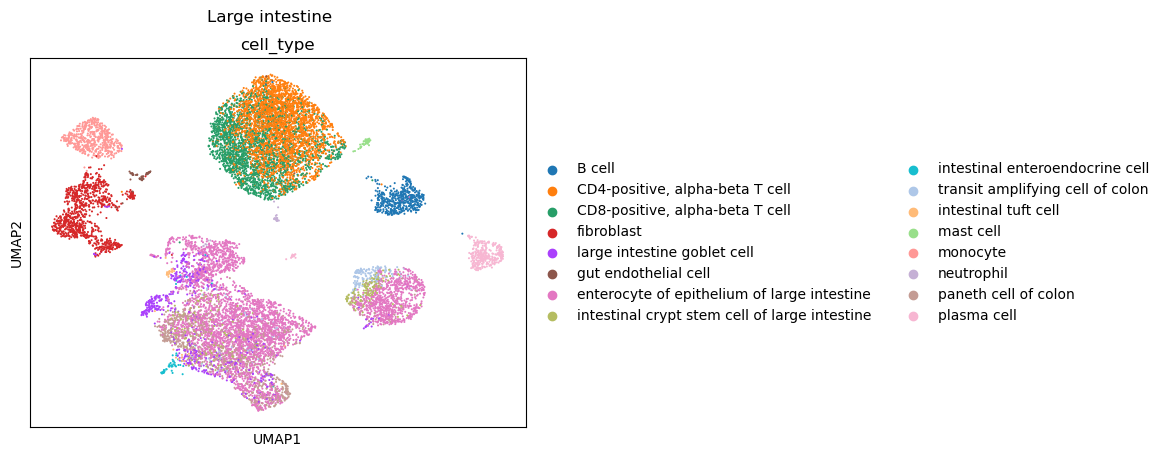

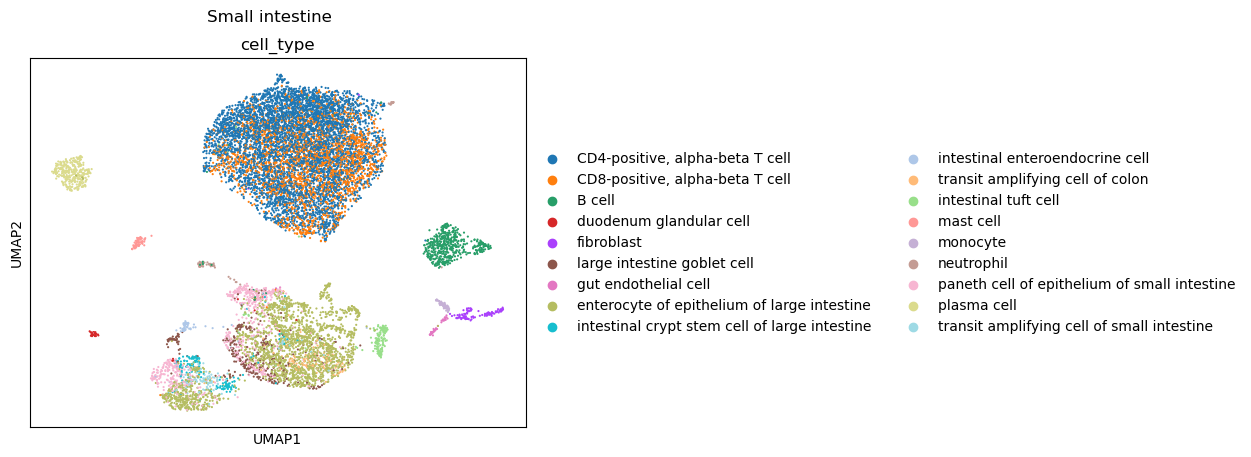

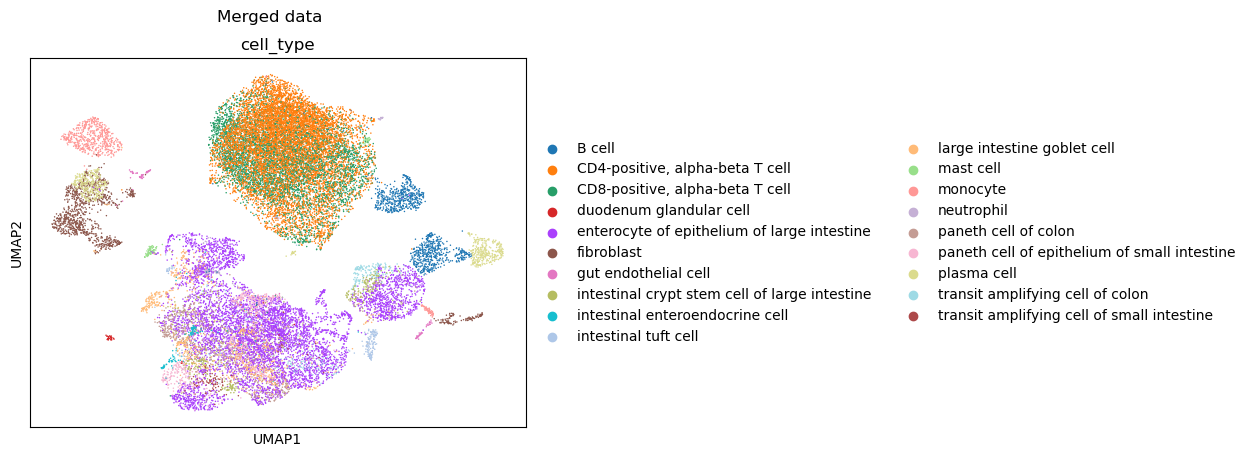

In [9]:
# Aplicação do UMAP
umapAnn(adata, 'Large intestine')
umapAnn(adatinha, 'Small intestine')
umapAnn(merged_adata, 'Merged data')

<h3 align="="> LEIDEN  </h3>

<p>Utilização do agrupamento pelo algorítmo leiden, o qual é usado para agrupar células semelhantes com base em seus perfis de expressão gênica e a conectividade entre elas. O algoritmo tenta encontrar agrupamentos de células que são mais densamente conectados entre si do que com células de outros agrupamentos. </p>

In [10]:
def leidenAnn(ann, name, resolution=.3, color=['leiden']):
    sc.pp.neighbors(ann)
    sc.tl.leiden(ann, resolution=resolution)
    sc.pl.umap(ann, color=color, show=False)
    plt.gcf().suptitle(name)

/home/ABTLUS/joao220047/anaconda3/envs/BM/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ABTLUS/joao220047/anaconda3/envs/BM/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ABTLUS/joao220047/anaconda3/envs/BM/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


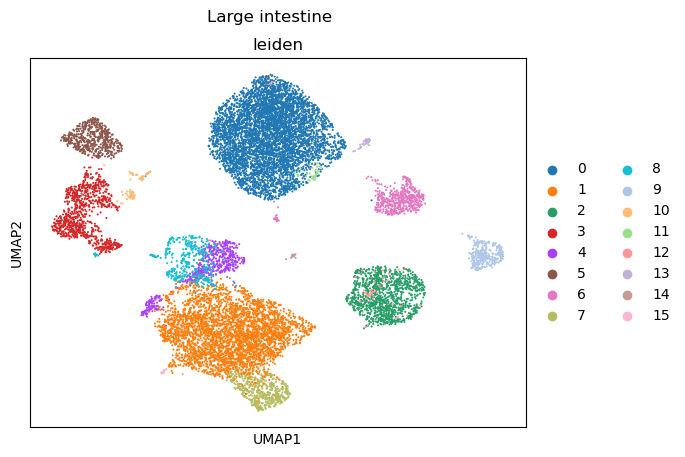

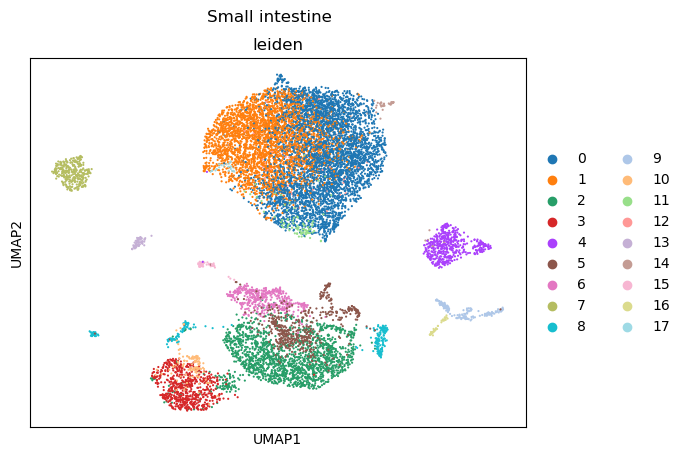

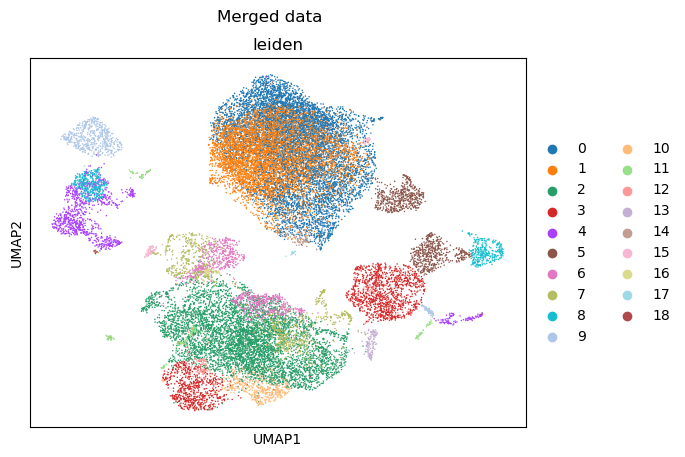

In [11]:
leidenAnn(adata, 'Large intestine')
leidenAnn(adatinha, 'Small intestine')
leidenAnn(merged_adata, 'Merged data')

### ACURÁCIA DO LEIDEN

In [12]:
def accuracyLeiden(ann, name):
    preClusters = defaultdict(lambda: [])
    clustersIds = defaultdict(lambda: [])
    
    for cellId, cellCluster in zip(ann.obs['leiden'].index, ann.obs['leiden']):
        preClusters[cellCluster].append(ann.obs.loc[cellId]['cell_type'])
        clustersIds[cellCluster].append(cellId)
    
    clusters = defaultdict(lambda: None)
    
    for key in preClusters:
        moda = mode(preClusters[key])
        clusters[moda] = clustersIds[key]
    
    right = 0
    size = 0
    for predictedType in clusters:
        for cellId in clusters[predictedType][:10]:
            trueType = ann.obs.loc[cellId]['cell_type']
            right += (predictedType == trueType)
            size += 1
    
    print(f'{name} Leiden accuracy: {right/size} / {100*(right/size):.2f}%')

In [13]:
accuracyLeiden(adata, 'Large intestine')
accuracyLeiden(adatinha, 'Small intestine')
accuracyLeiden(merged_adata, 'Merged data')

Large intestine Leiden accuracy: 0.89 / 89.00%
Small intestine Leiden accuracy: 0.8454545454545455 / 84.55%
Merged data Leiden accuracy: 0.8739495798319328 / 87.39%


<h3 align="="> ENCONTRE MARCADORES GENÉTICOS  </h3>


In [14]:
def markerGenesFinder(ann, name, groupby='cell_type', method='wilcoxon', geneSymbols='feature_name'):
    sc.pp.log1p(ann)
    sc.tl.rank_genes_groups(ann, groupby, method=method, use_raw=False)
    sc.pl.rank_genes_groups(ann, sharey=False, show=False, use_raw=False, gene_symbols=geneSymbols)

    marker_genes = {}
    fig = plt.gcf()
    fig.suptitle(name)
    for ax in fig.axes:
        title = ax.get_title().split(' vs. ')[0]
        gene_symbol = ax.get_children()[0].get_text()
        marker_genes[title] = gene_symbol
        
    return marker_genes

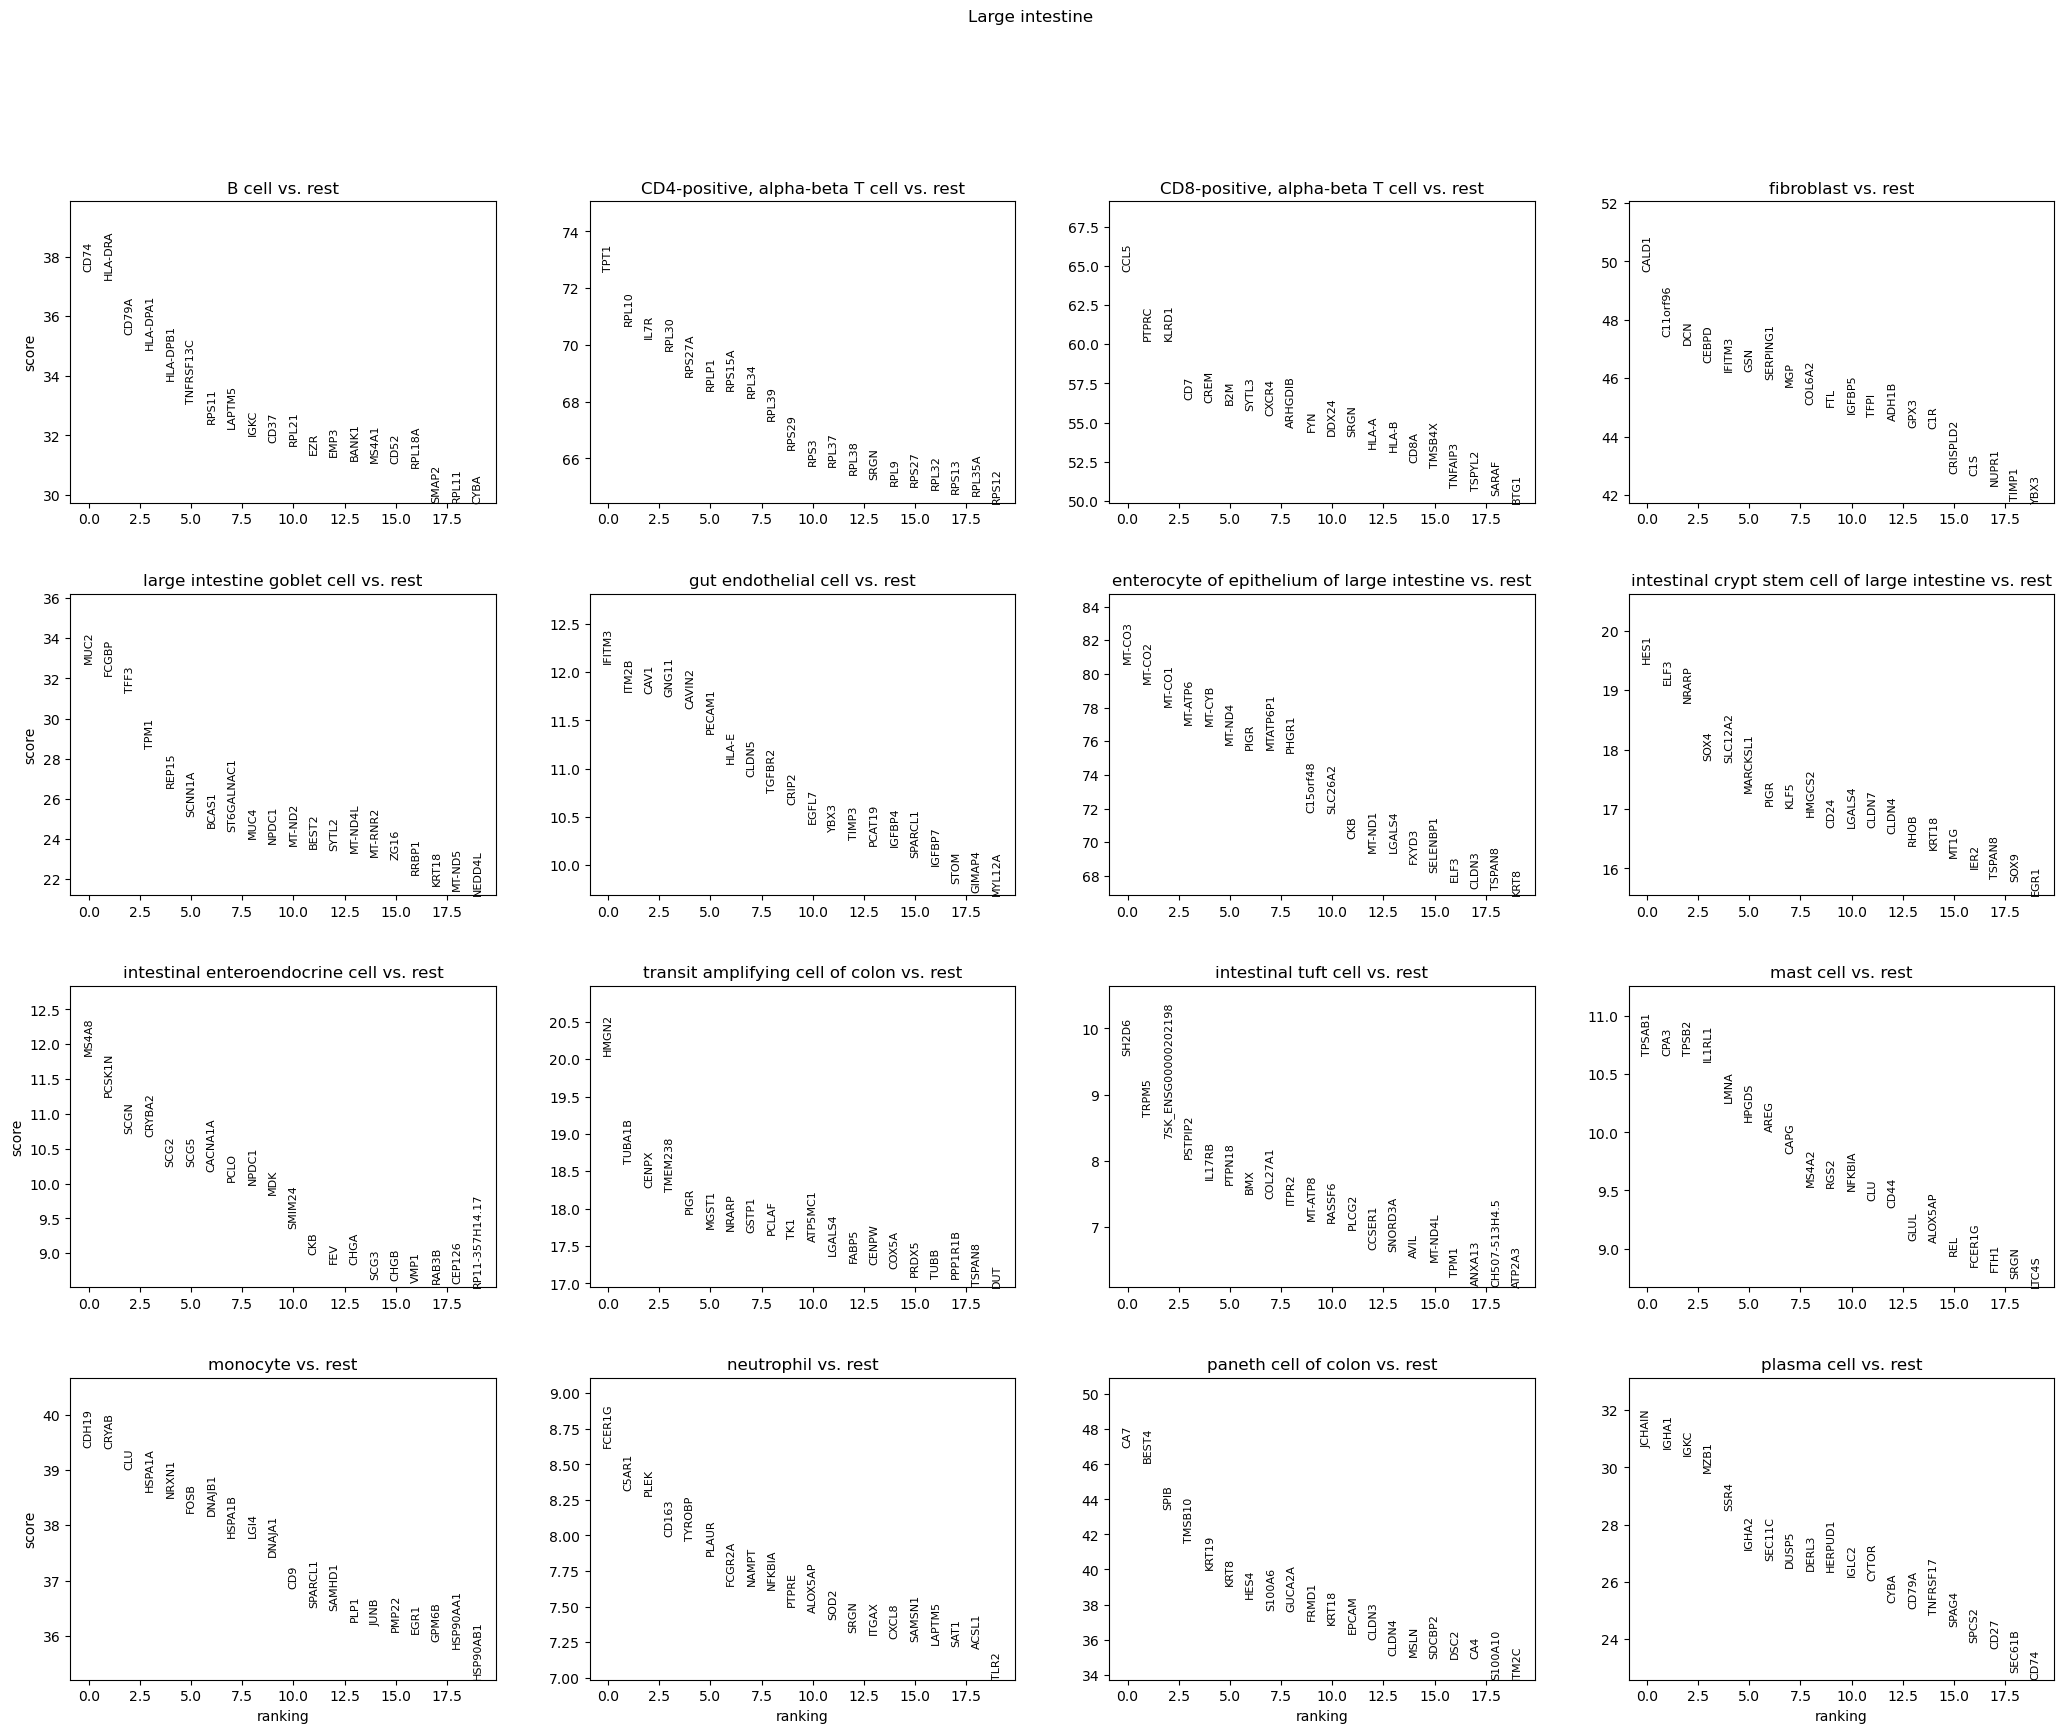

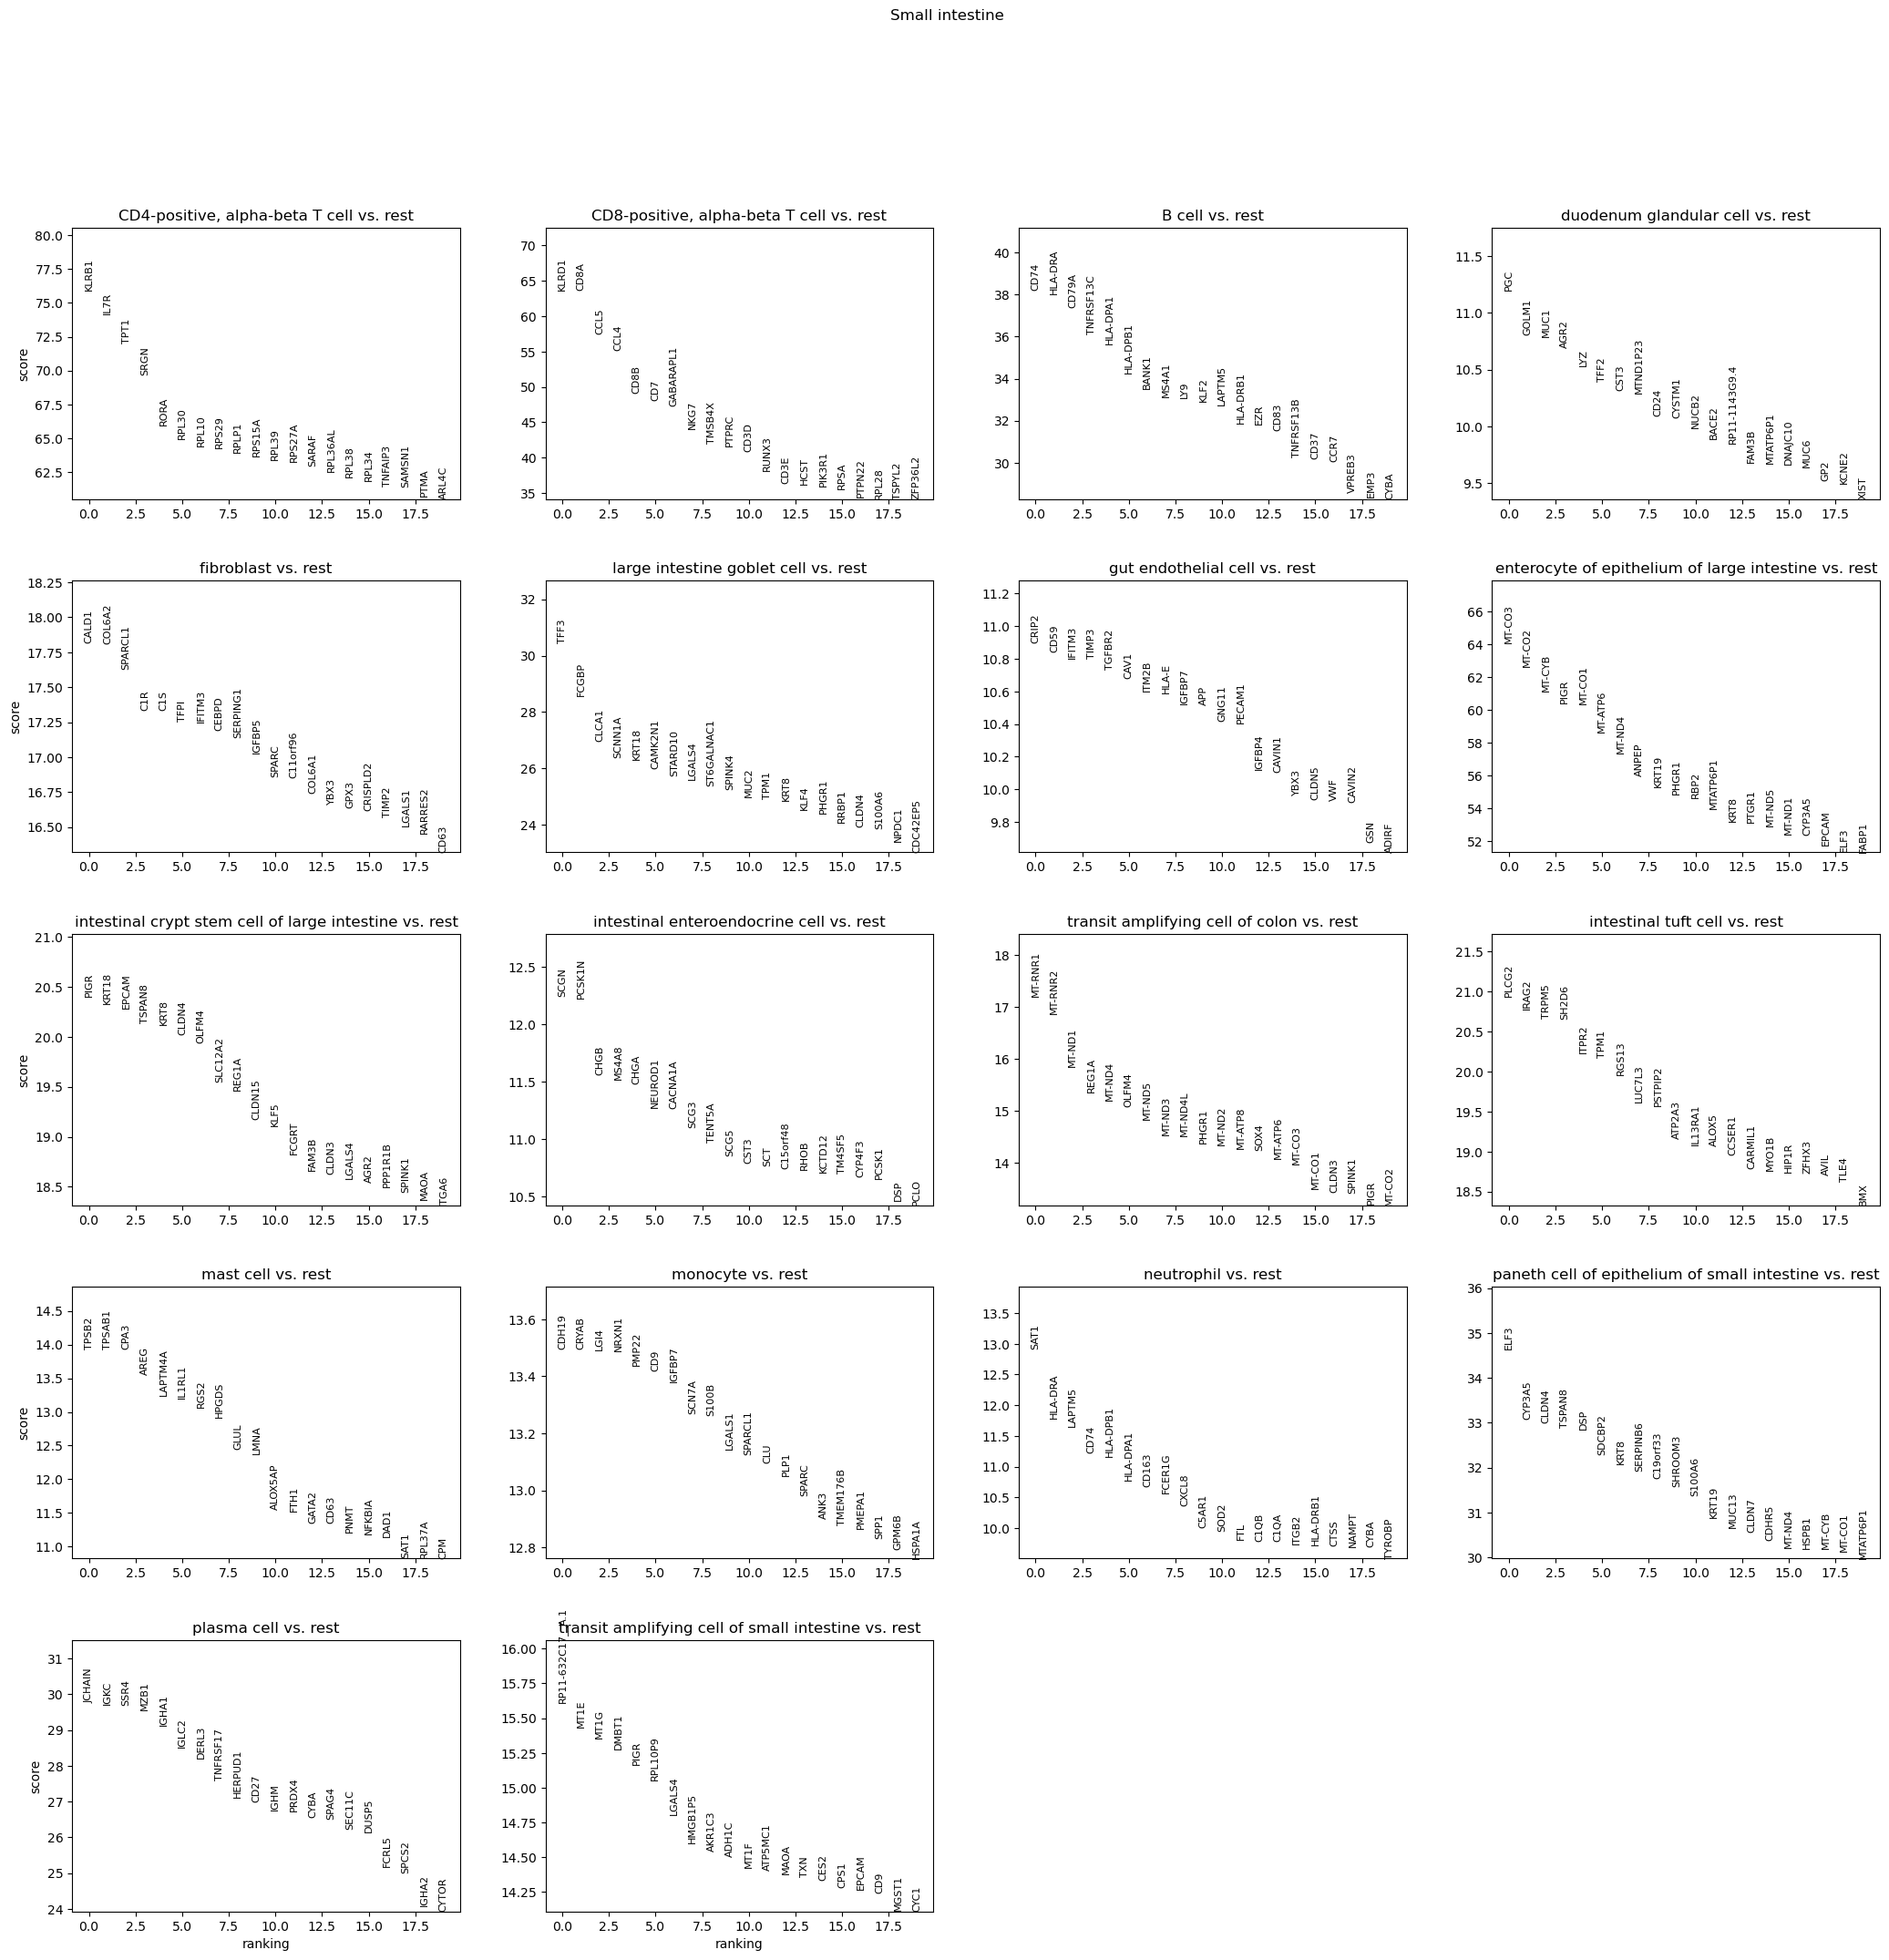

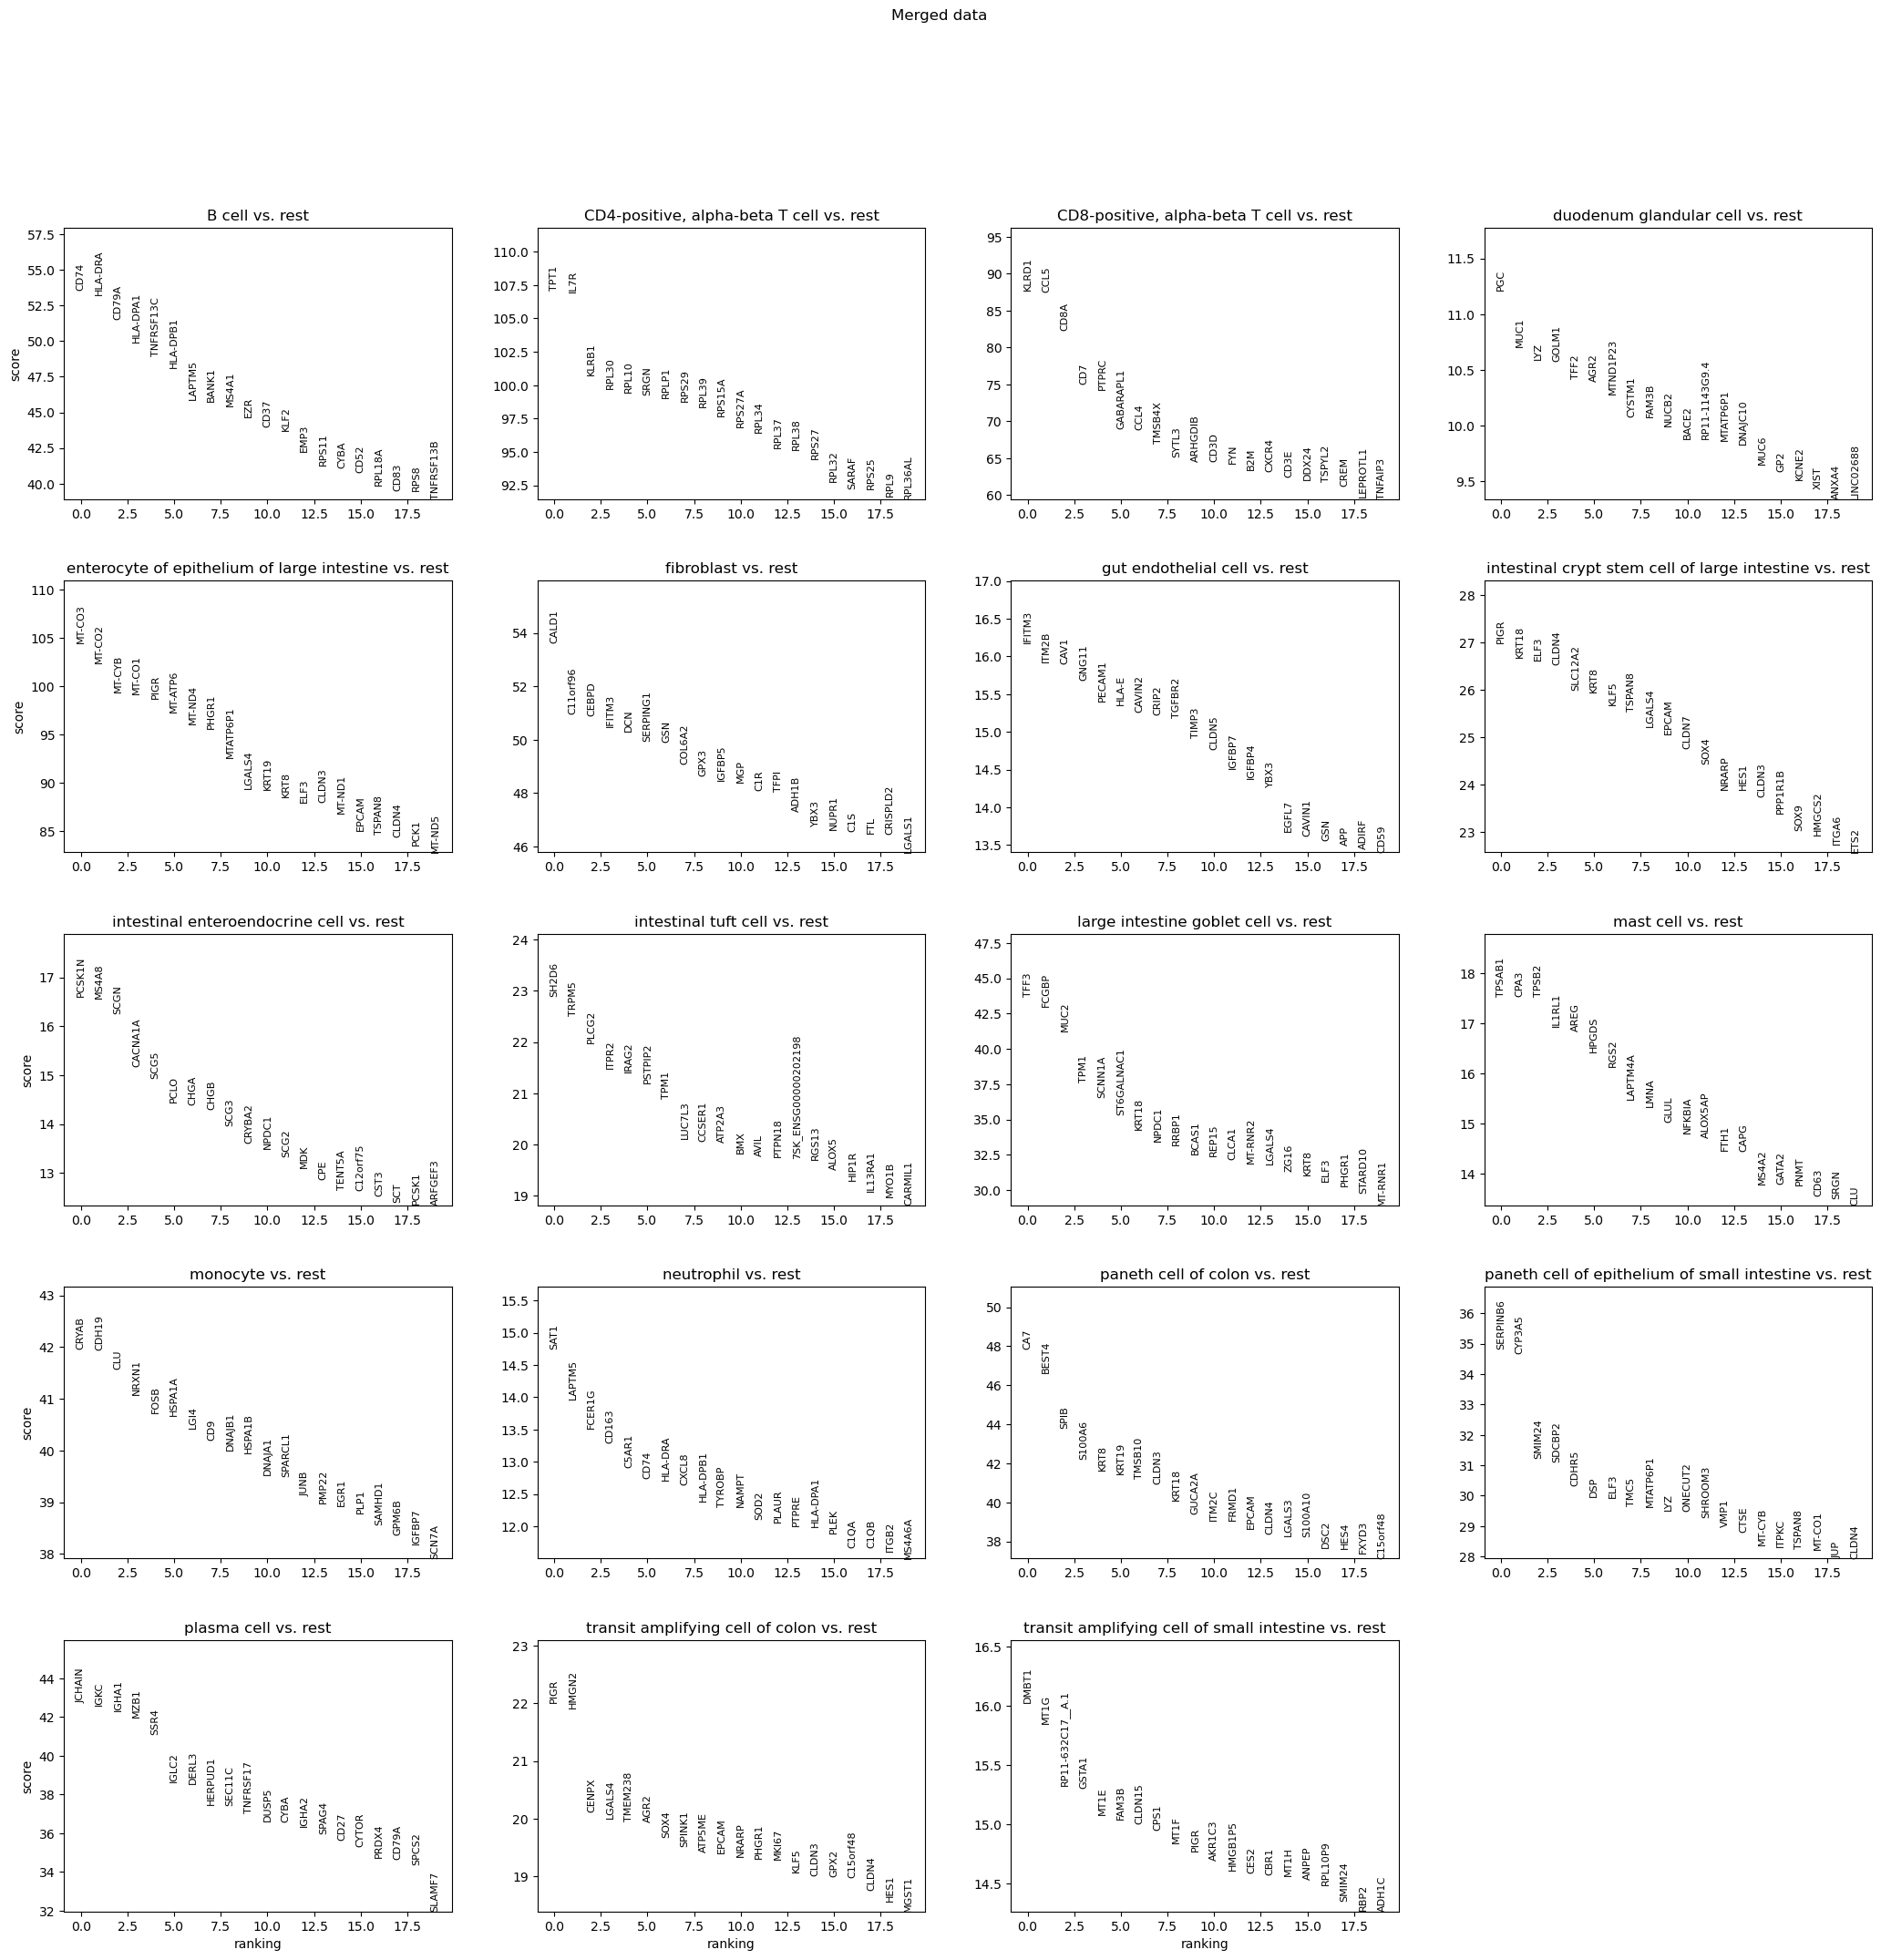

In [15]:
markerDictAdata = markerGenesFinder(adata, 'Large intestine')
markerDictAdatinha = markerGenesFinder(adatinha, 'Small intestine')
markerDictMergedAdata = markerGenesFinder(merged_adata, 'Merged data')

### GENES MAIS EXPRESSOS

In [16]:
def mostExprGenes(ann, name, nTop=20, geneSymbols='feature_name'):
    sc.pl.highest_expr_genes(ann, n_top=nTop, gene_symbols=geneSymbols, show=False)
    plt.gcf().suptitle(name)

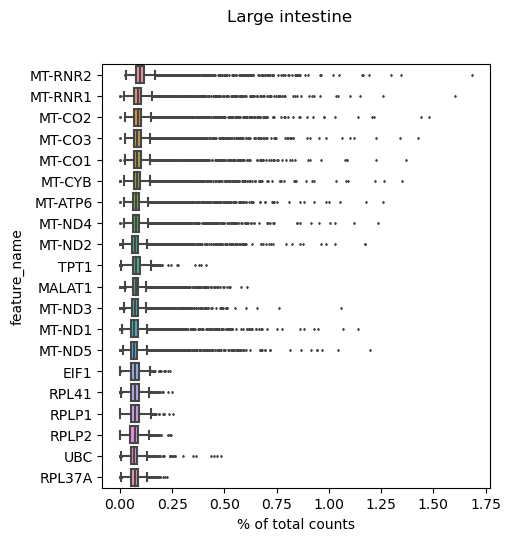

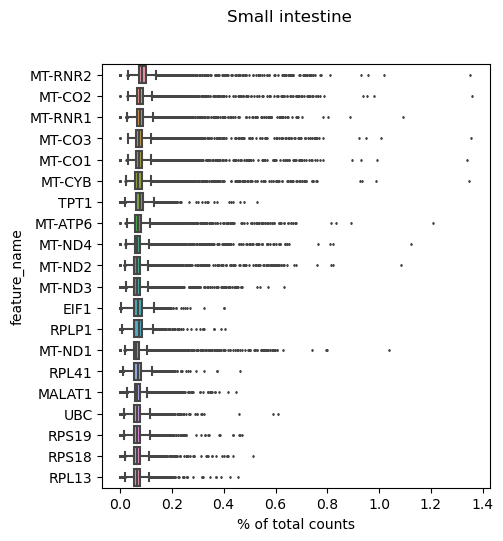

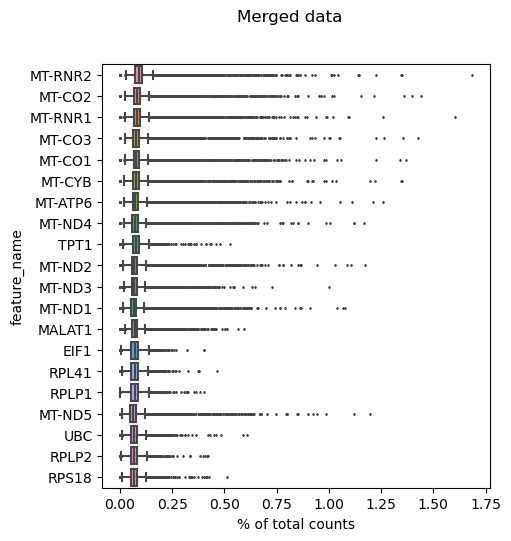

In [17]:
mostExprGenes(adata, 'Large intestine')
mostExprGenes(adatinha, 'Small intestine')
mostExprGenes(merged_adata, 'Merged data')

### DENDROGRAMA DE TIPOS CELULARES

In [18]:
def dendrogramAnn(ann, name, groupby='cell_type'):
    sc.tl.dendrogram(ann, groupby)
    sc.pl.dendrogram(ann, groupby, show=False)
    plt.gcf().suptitle(name)
    plt.show()

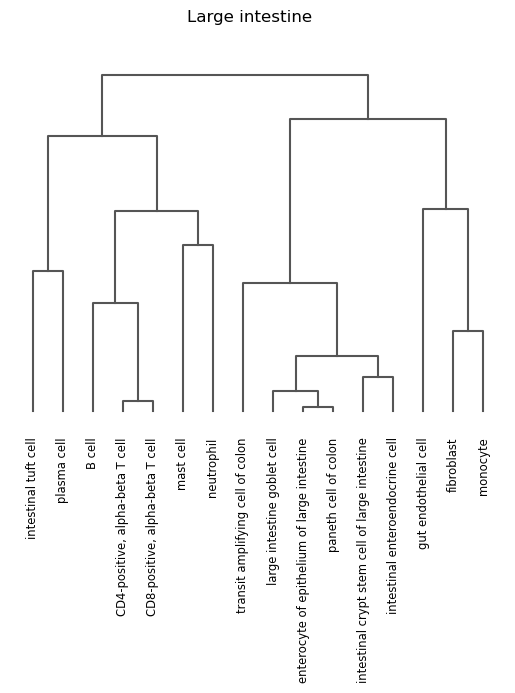

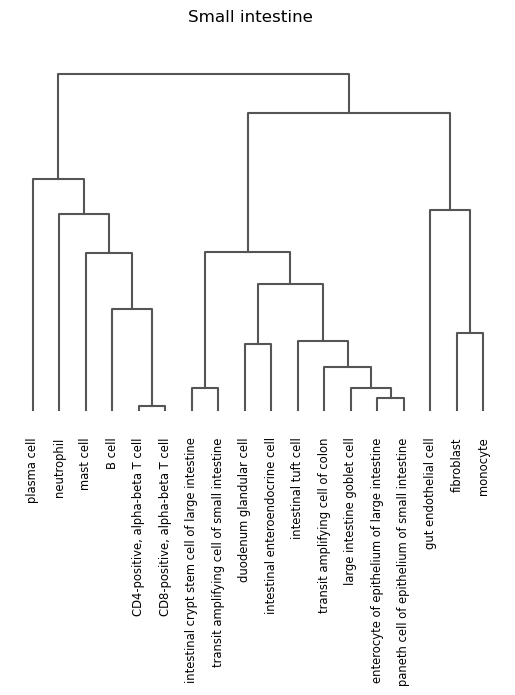

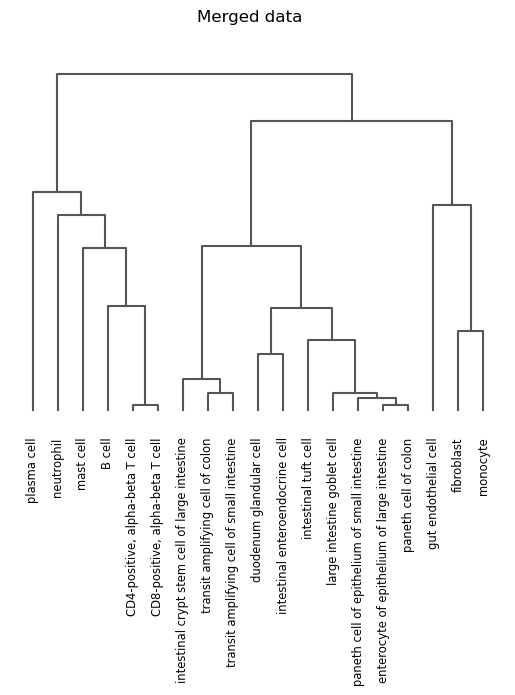

In [19]:
dendrogramAnn(adata, 'Large intestine')
dendrogramAnn(adatinha, 'Small intestine')
dendrogramAnn(merged_adata, 'Merged data')

### DOTPLOT

In [32]:
def dotplotAnn(ann, markerGenesDict, name, groupby='cell_type', dendrogram=True, geneSymbols='feature_name'):
    sc.pl.dotplot(ann, markerGenesDict, groupby=groupby, dendrogram=dendrogram, use_raw=False, gene_symbols=geneSymbols, show=False)
    plt.gcf().suptitle(name)

/home/ABTLUS/joao220047/anaconda3/envs/BM/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
/home/ABTLUS/joao220047/anaconda3/envs/BM/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
/home/ABTLUS/joao220047/anaconda3/envs/BM/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


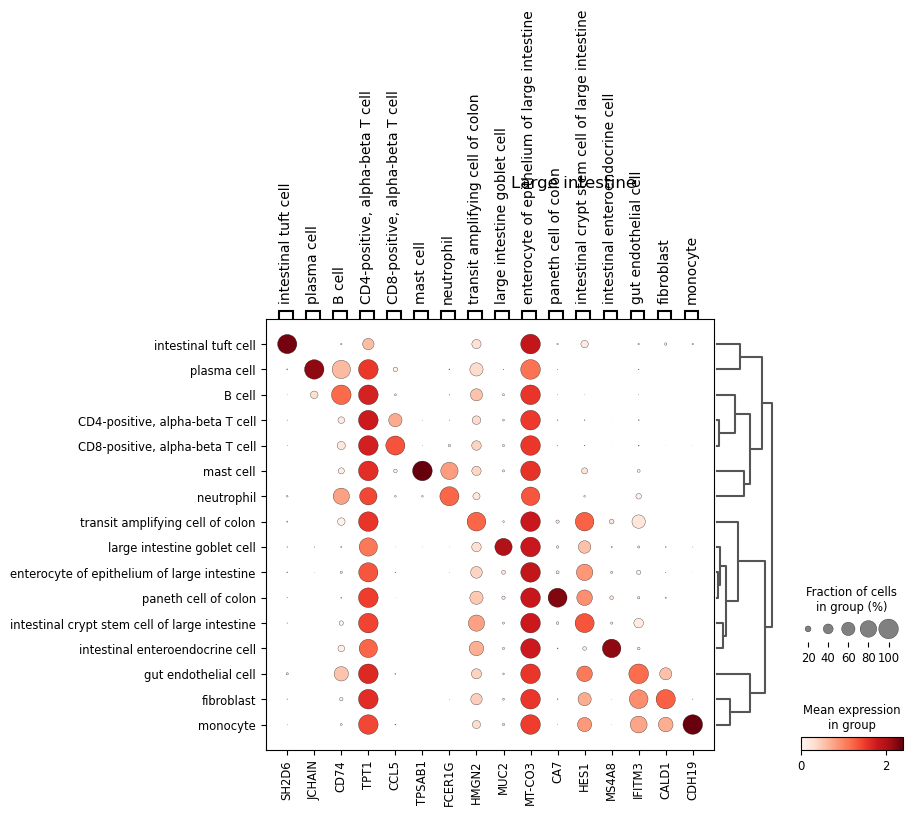

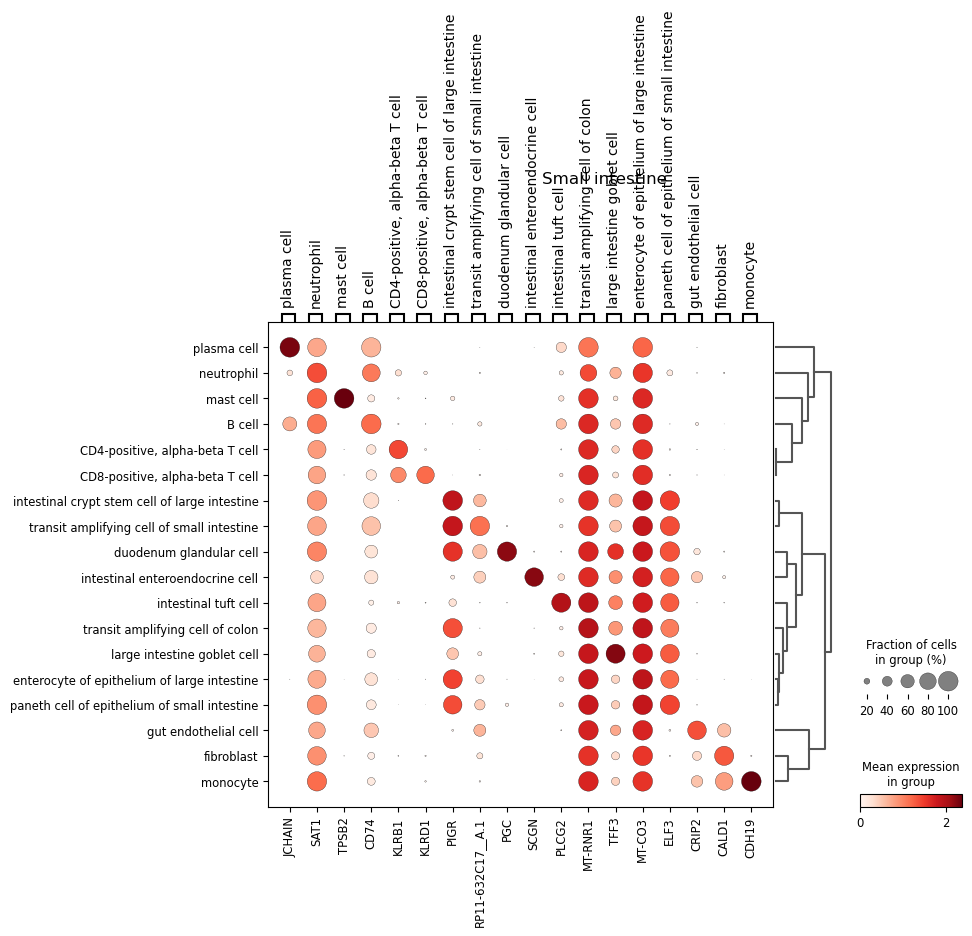

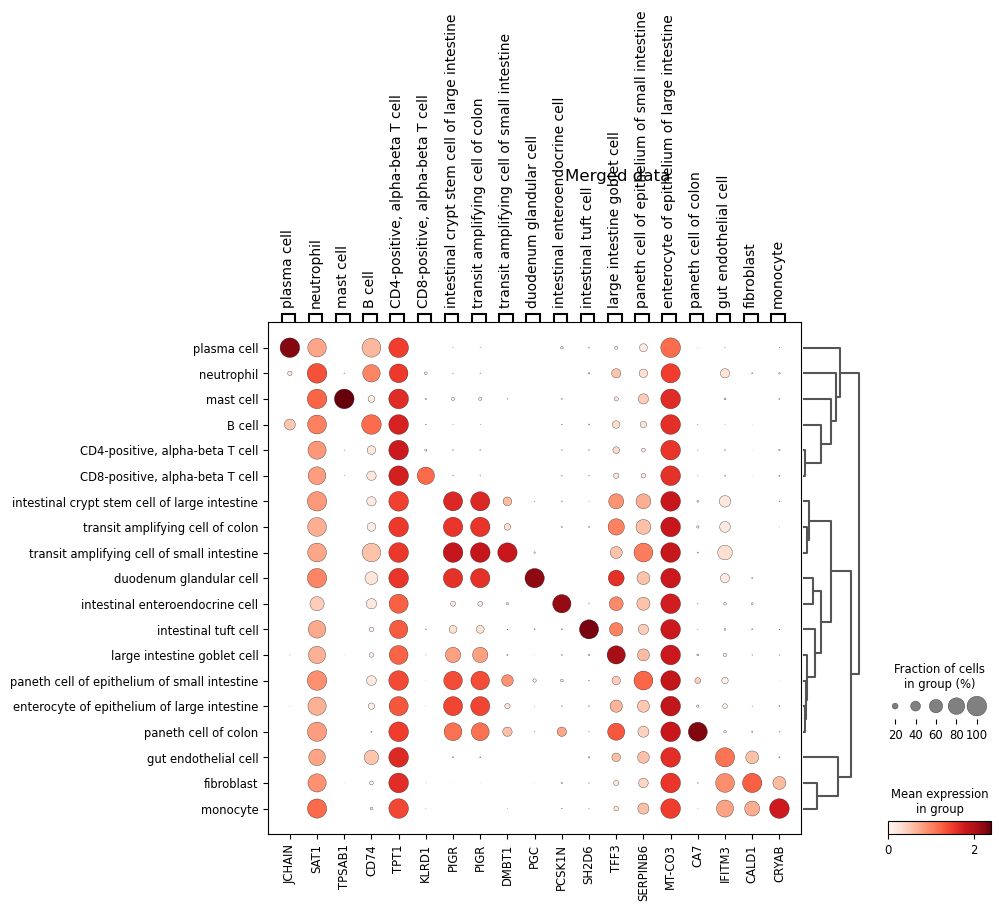

In [33]:
dotplotAnn(adata, markerDictAdata, 'Large intestine')
dotplotAnn(adatinha, markerDictAdatinha, 'Small intestine')
dotplotAnn(merged_adata, markerDictMergedAdata, 'Merged data')

### MATRIXPLOT

In [49]:
def matrixplotAnn(ann, markerGenesDict, name, groupby='cell_type', geneSymbols='feature_name'):
    mp = sc.pl.matrixplot(ann, markerGenesDict, groupby, return_fig=True, use_raw=False, gene_symbols=geneSymbols)
    mp.add_totals().style(edge_color='black')
    plt.gcf().suptitle(name)

In [50]:
matrixplotAnn(adata, markerDictAdata, 'Large intestine')
matrixplotAnn(adatinha, markerDictAdatinha, 'Small intestine')
matrixplotAnn(merged_adata, markerDictMergedAdata, 'Merged data')

<Figure size 640x480 with 0 Axes>

### HEATMAP

In [24]:
def heatmapAnn(ann, markerGenesDict, name, groupby='cell_type', dendrogram=True, geneSymbols='feature_name', figsize=(10, 10)):
    sc.pl.heatmap(ann, markerGenesDict, groupby=groupby, dendrogram=dendrogram, use_raw=False, gene_symbols=geneSymbols, figsize=figsize, show=False)
    plt.gcf().suptitle(name)

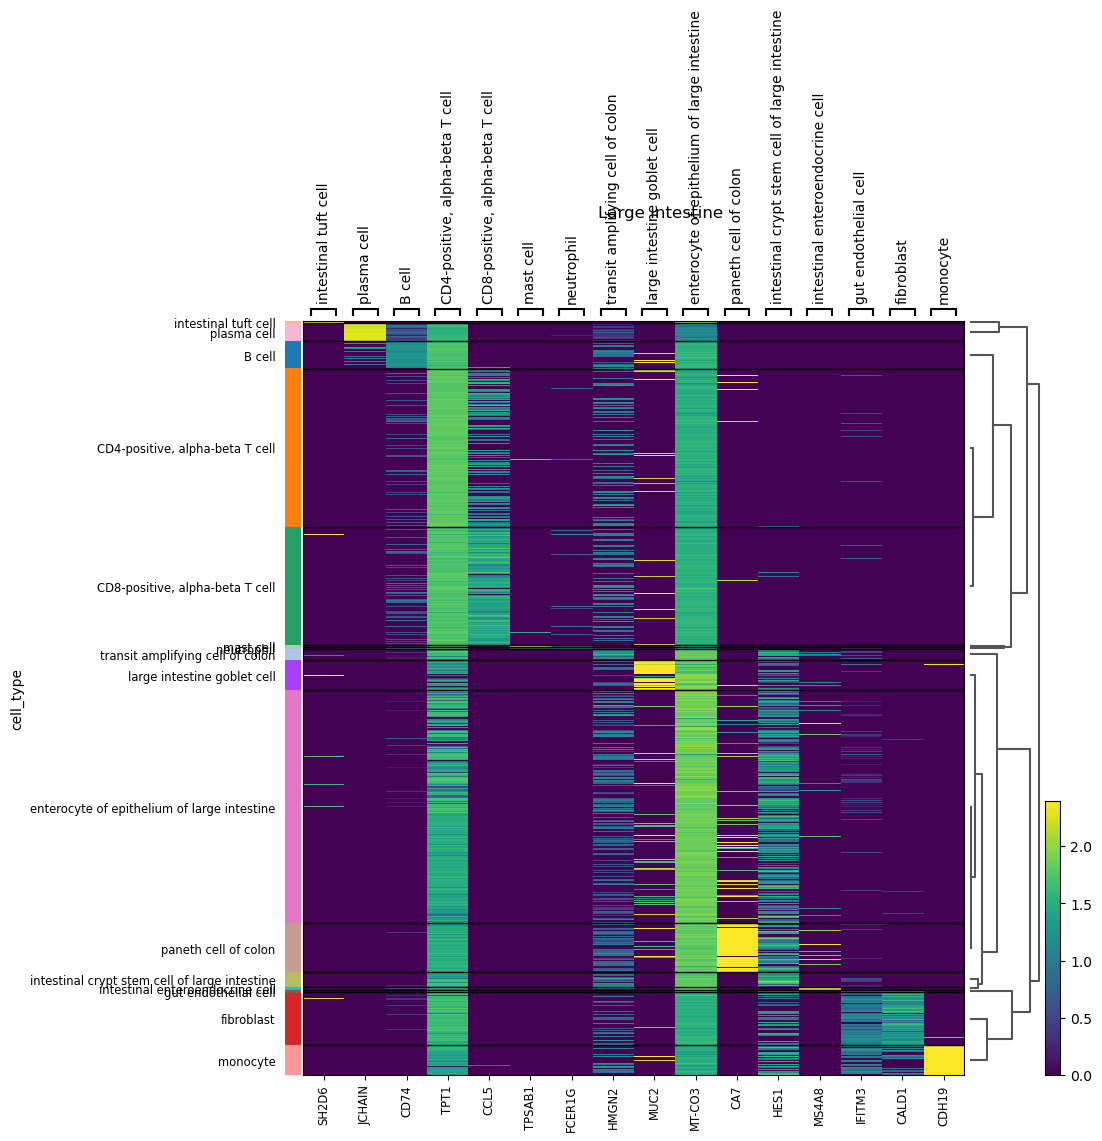

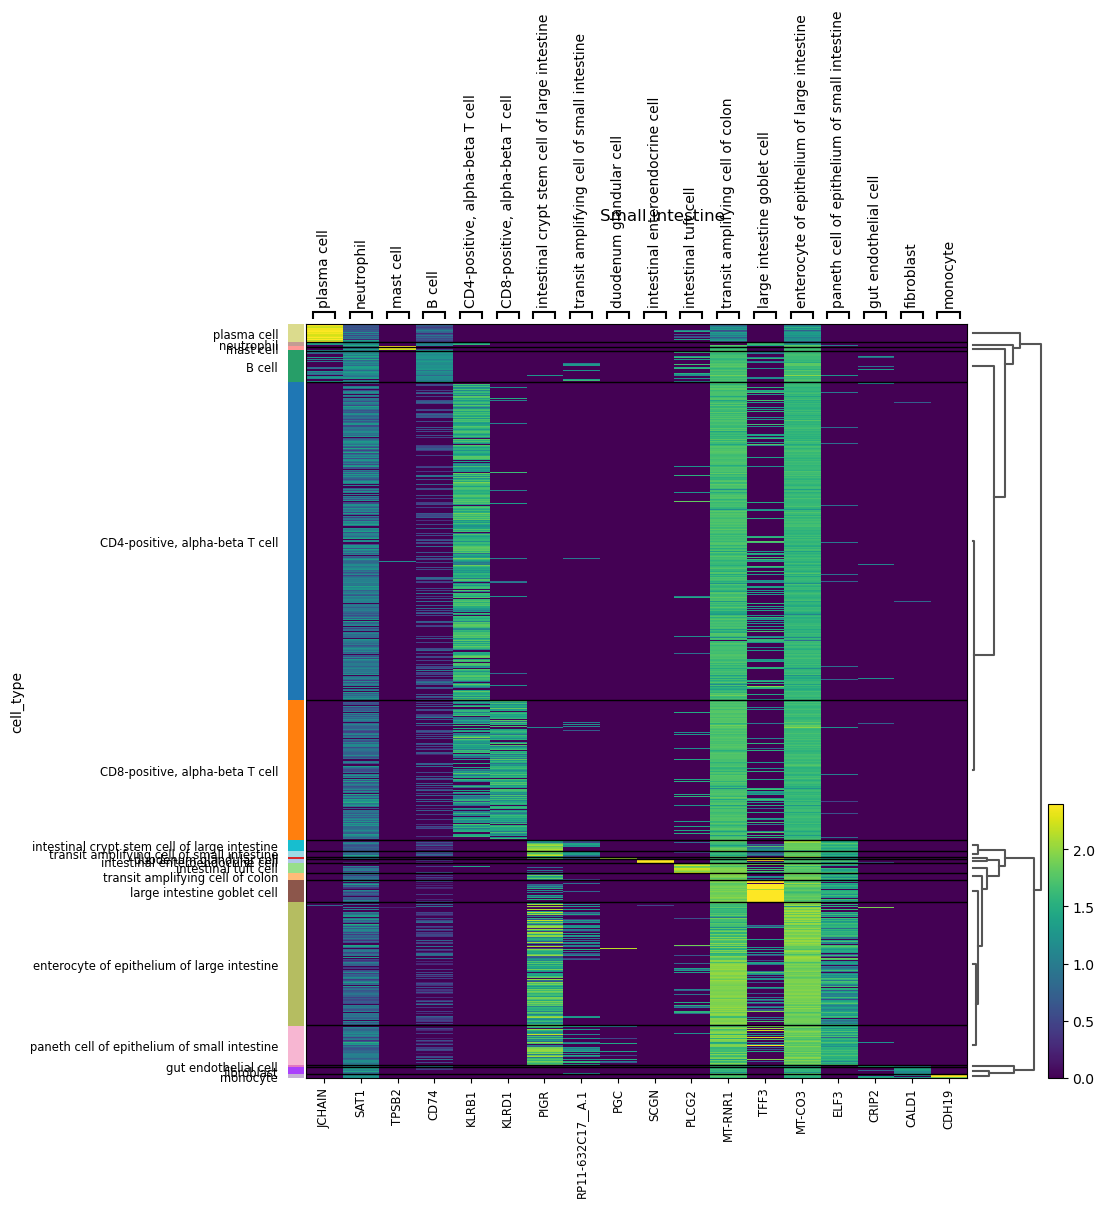

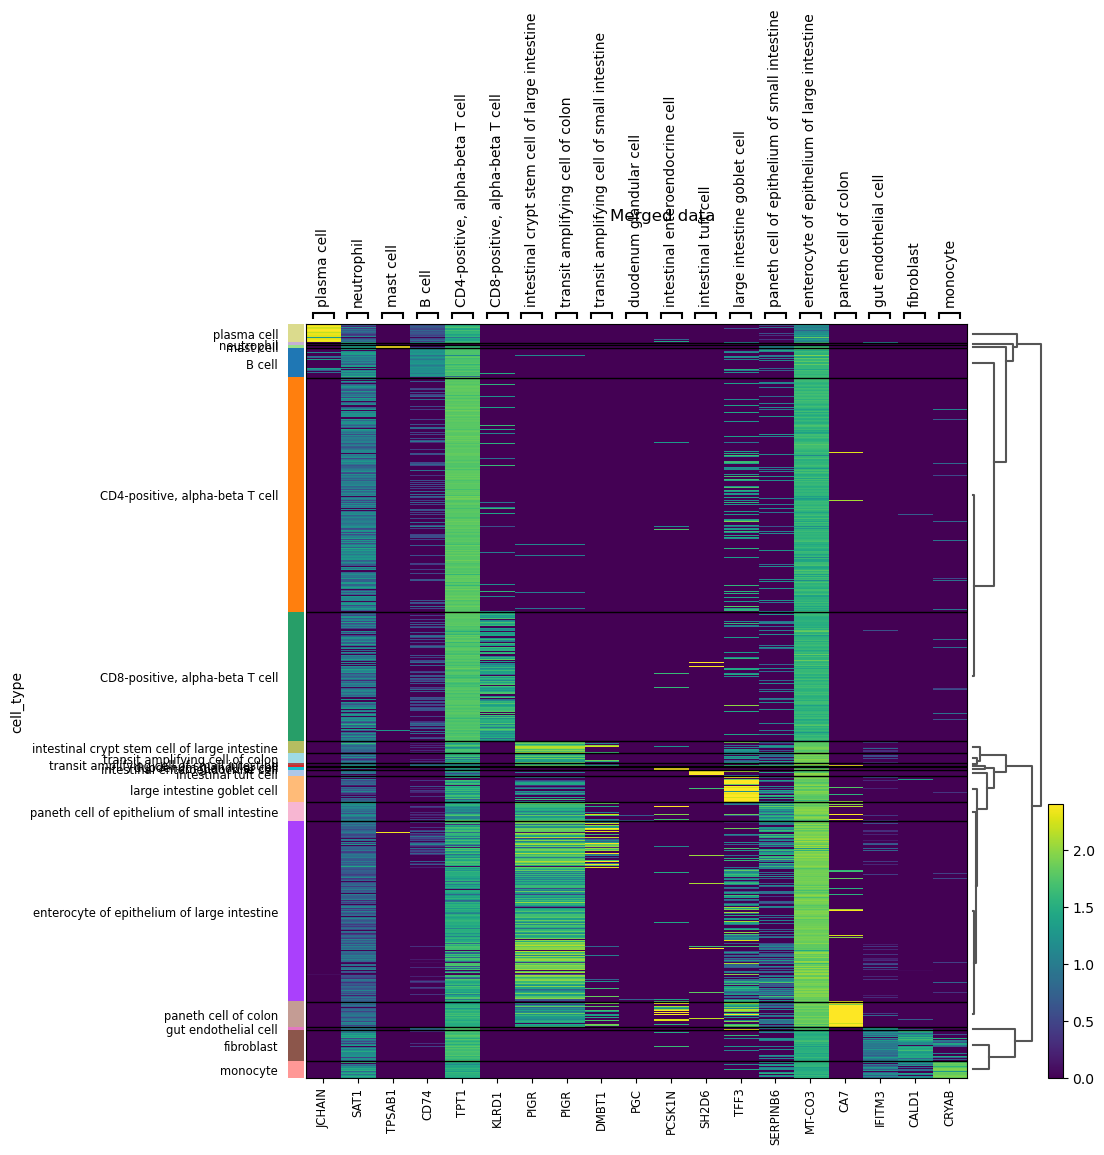

In [25]:
heatmapAnn(adata, markerDictAdata, 'Large intestine')
heatmapAnn(adatinha, markerDictAdatinha, 'Small intestine')
heatmapAnn(merged_adata, markerDictMergedAdata, 'Merged data')

### TRACKSPLOT

In [26]:
def tracksplotAnn(ann, markerGenesDict, name, groupby='cell_type', dendrogram=True, geneSymbols='feature_name', figsize=(30, 15)):
    sc.pl.tracksplot(ann, markerGenesDict, groupby=groupby, dendrogram=dendrogram, use_raw=False, gene_symbols=geneSymbols, figsize=figsize, show=False)
    plt.gcf().suptitle(name)

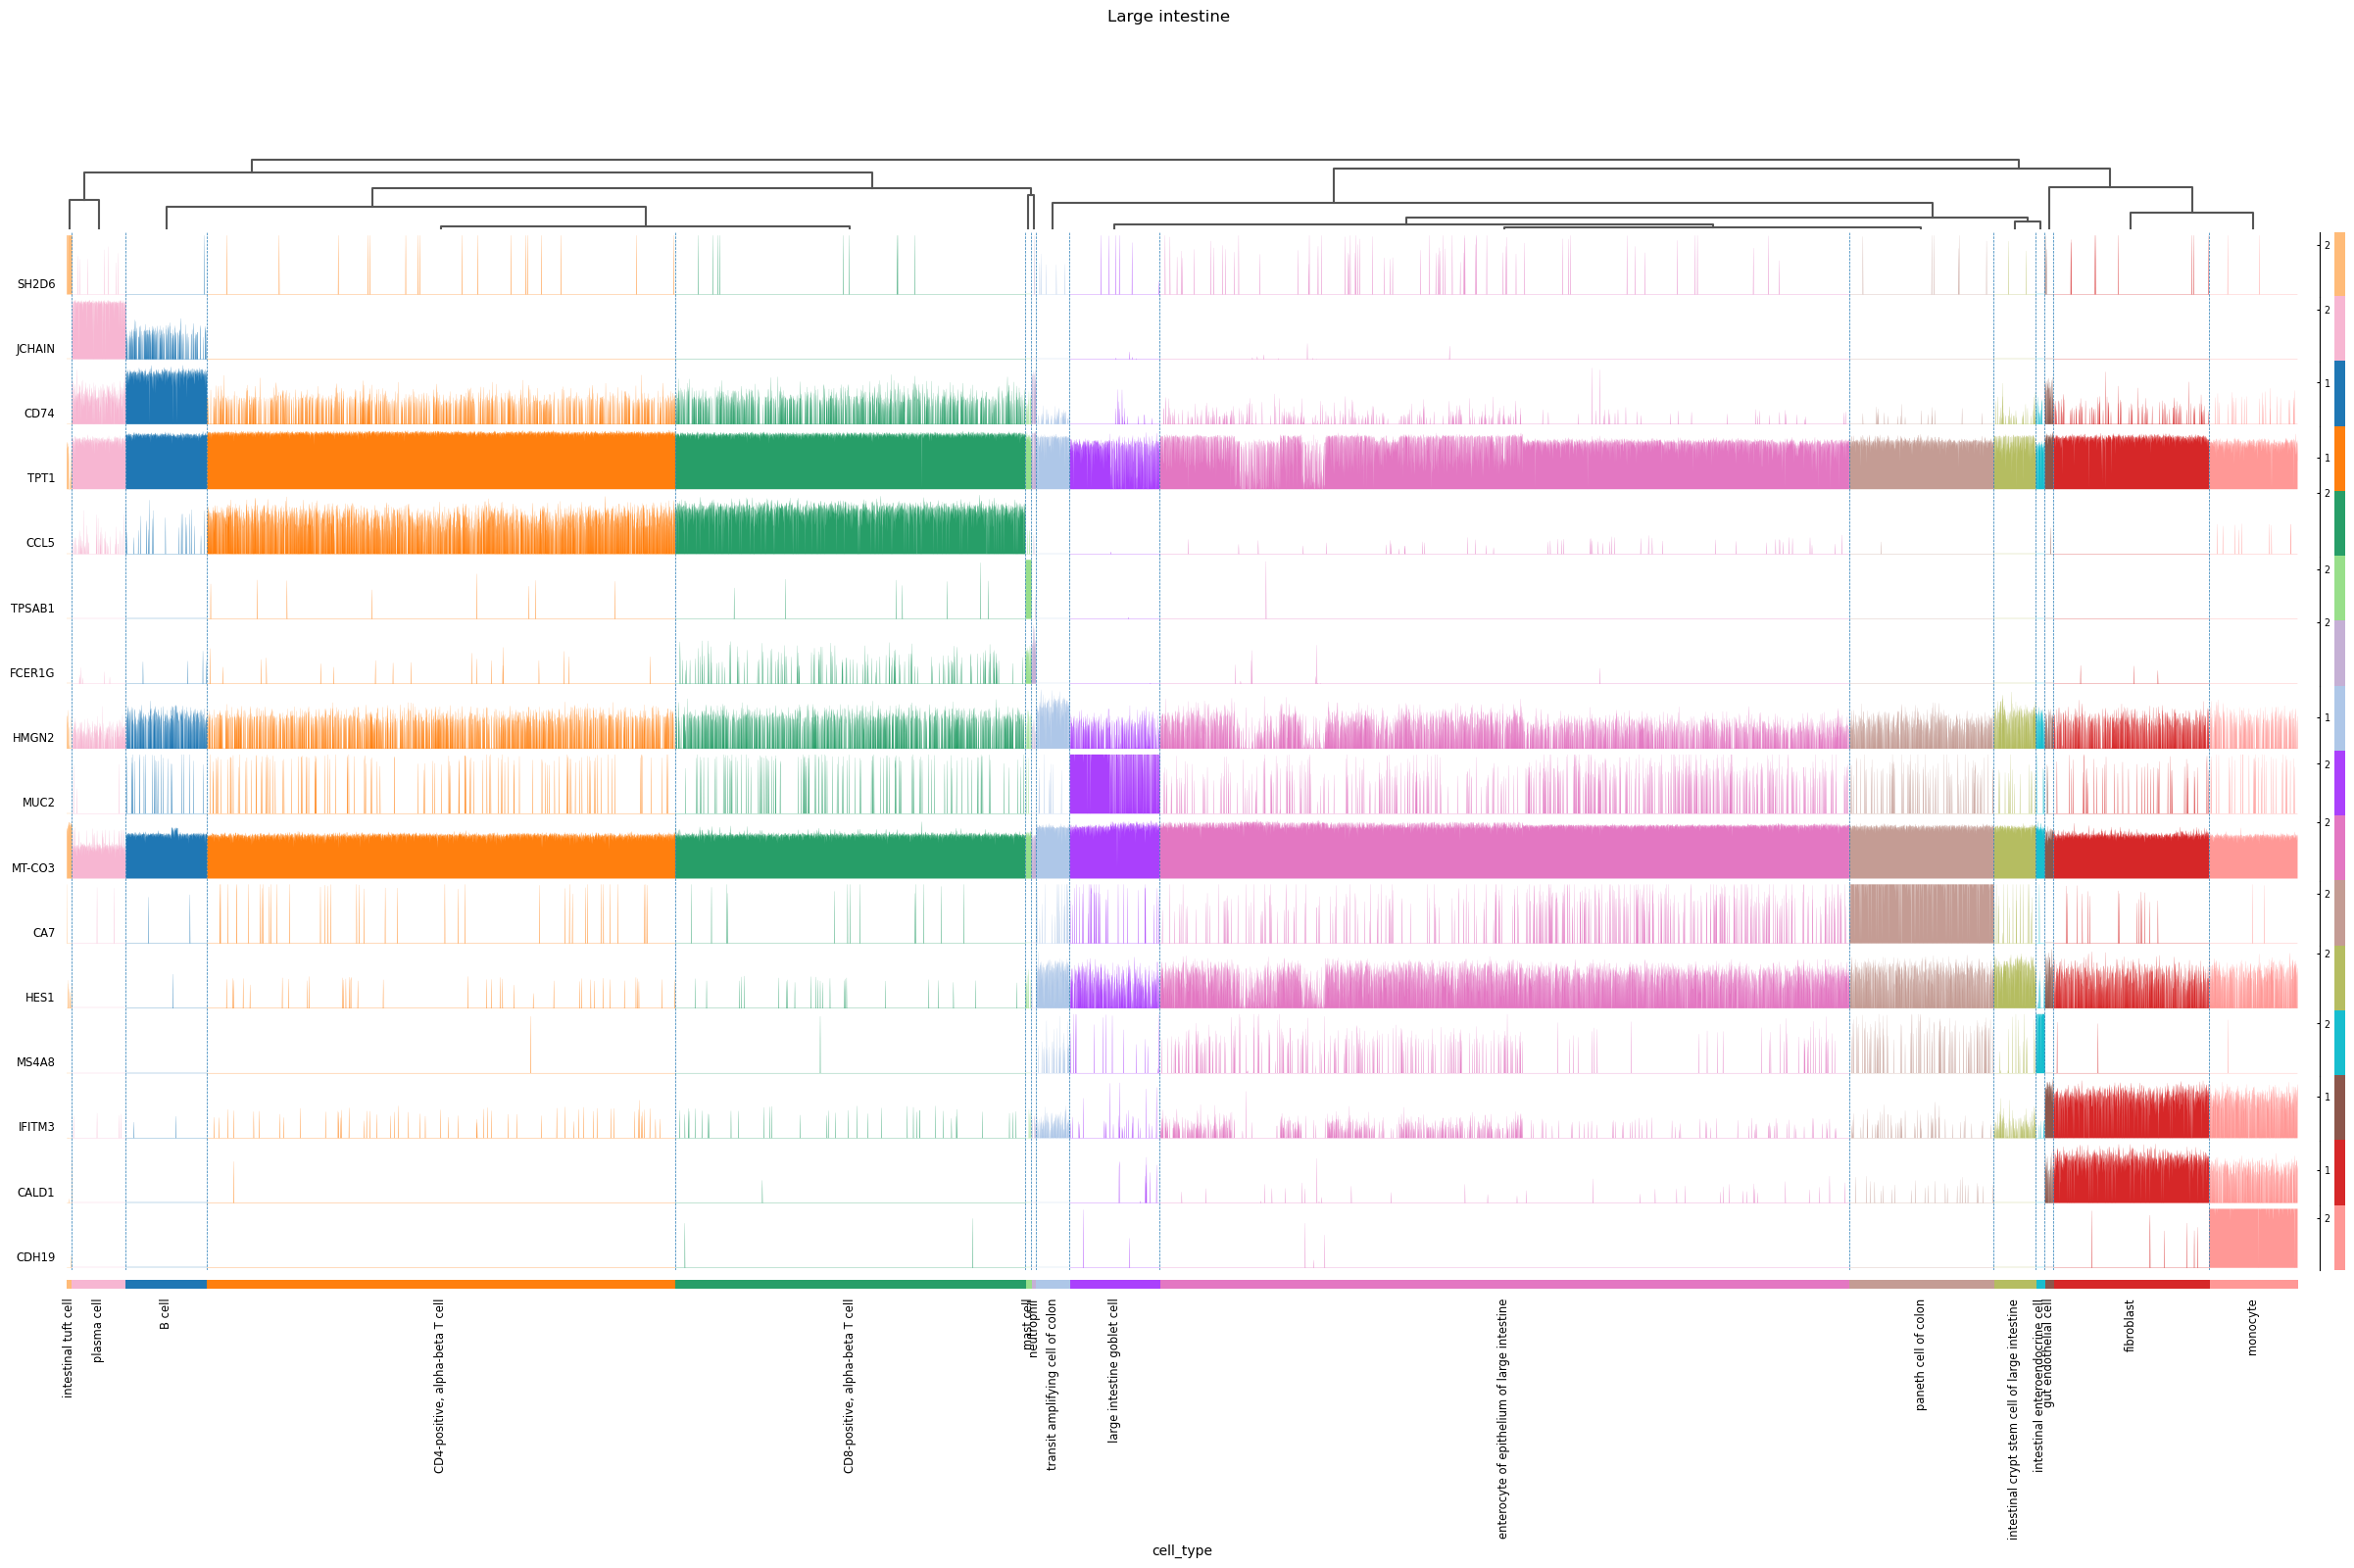

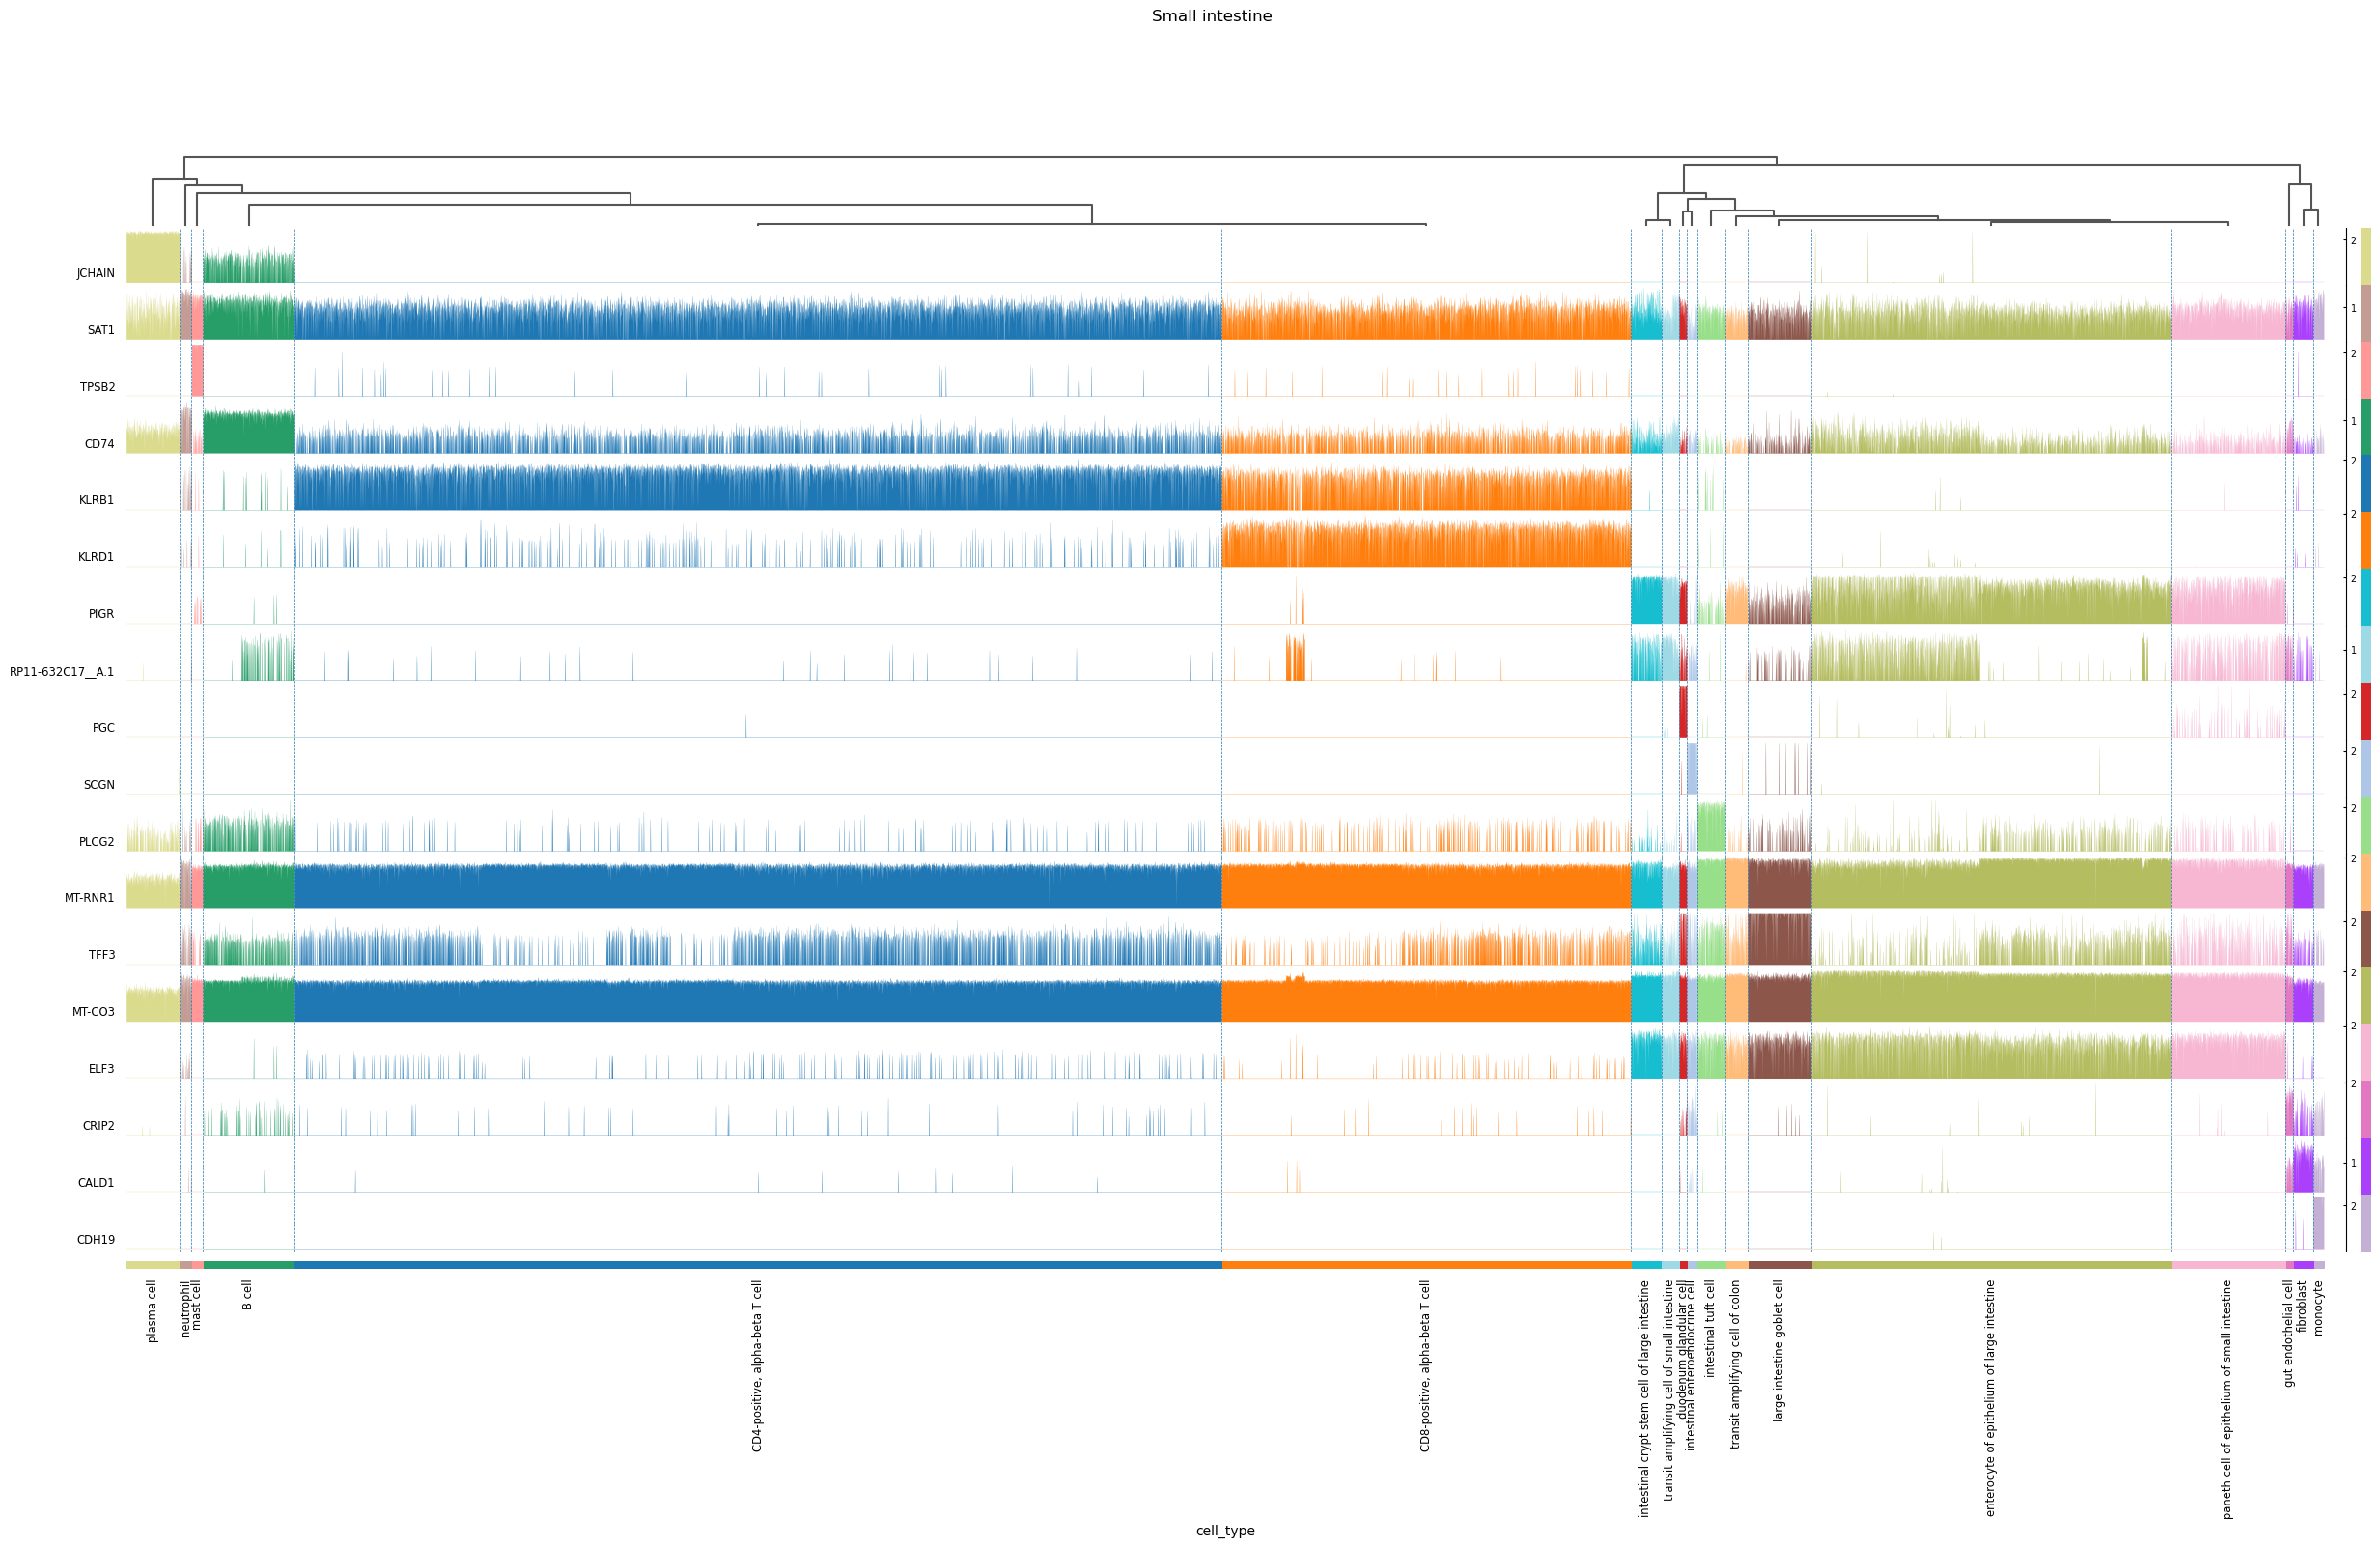

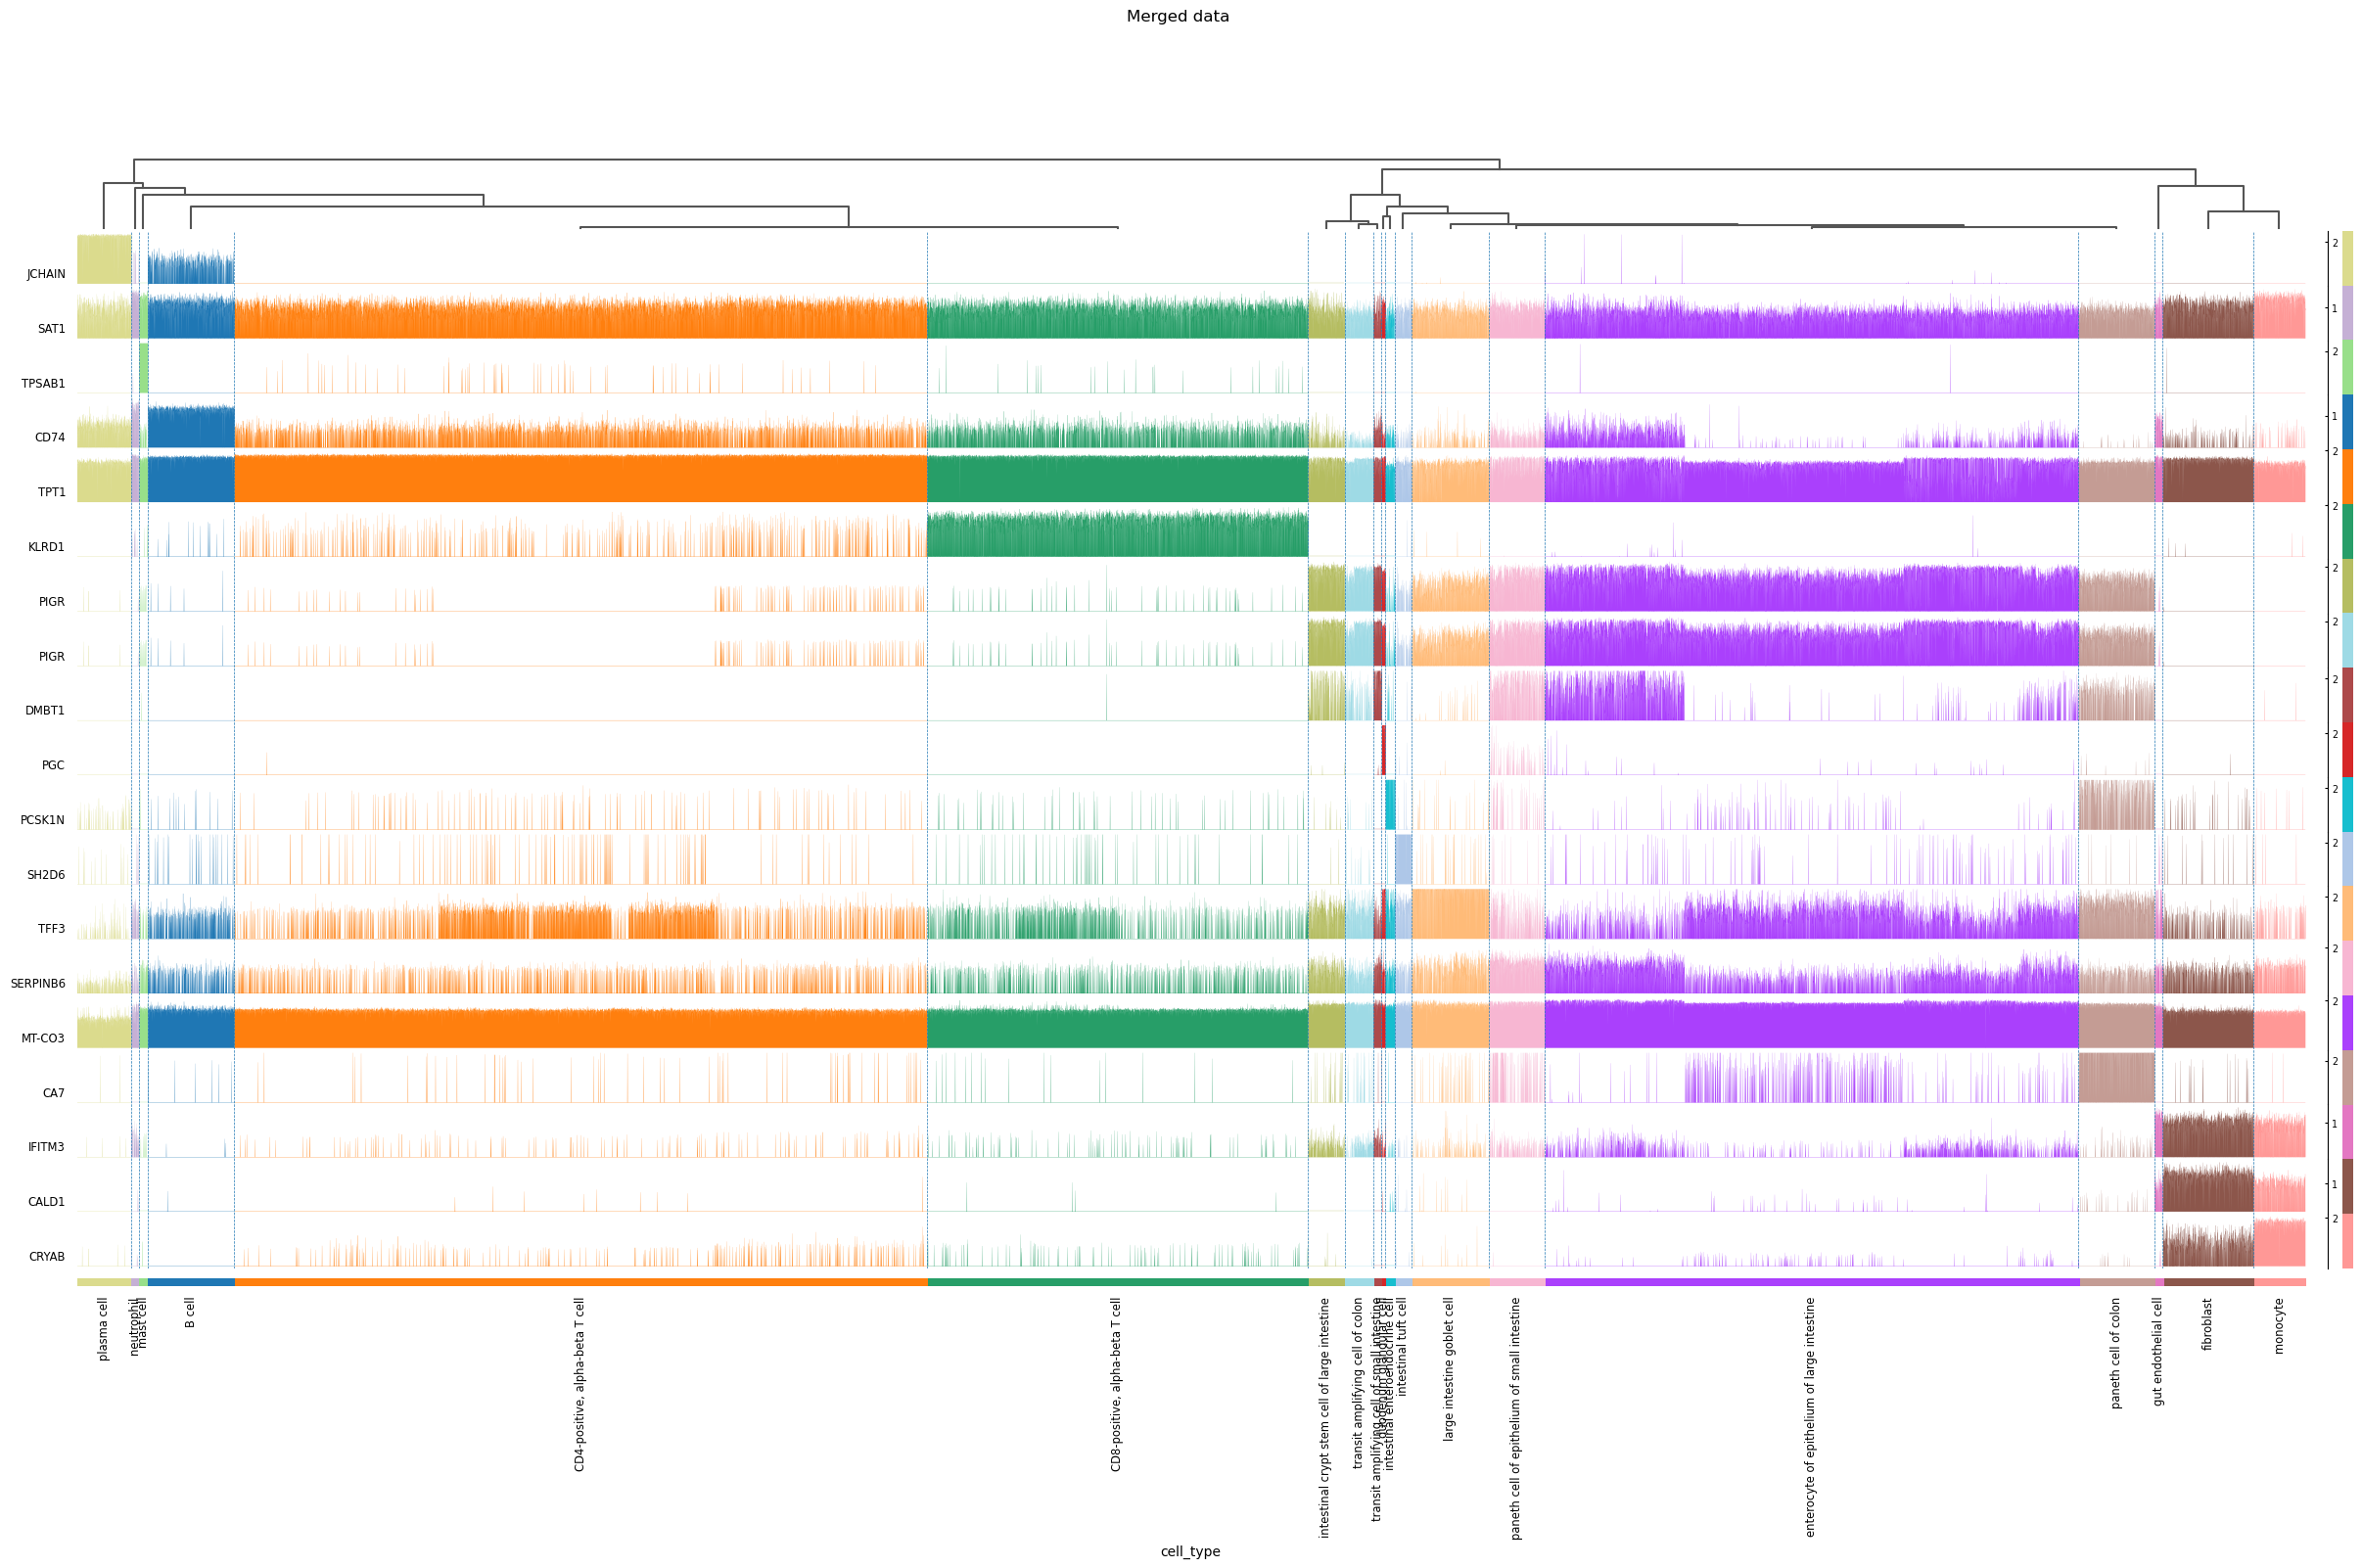

In [27]:
tracksplotAnn(adata, markerDictAdata, 'Large intestine')
tracksplotAnn(adatinha, markerDictAdatinha, 'Small intestine')
tracksplotAnn(merged_adata, markerDictMergedAdata, 'Merged data')

<h3 align="="> VIOLIN STACKED  </h3>


In [28]:
def violinAnn(ann, markerGenesDict, name, groupby='cell_type', geneSymbols='feature_name', figsize=(10, 10)):
    sc.pl.stacked_violin(ann, markerGenesDict, groupby=groupby, use_raw=False, gene_symbols=geneSymbols, figsize=figsize, show=False)
    plt.gcf().suptitle(name)

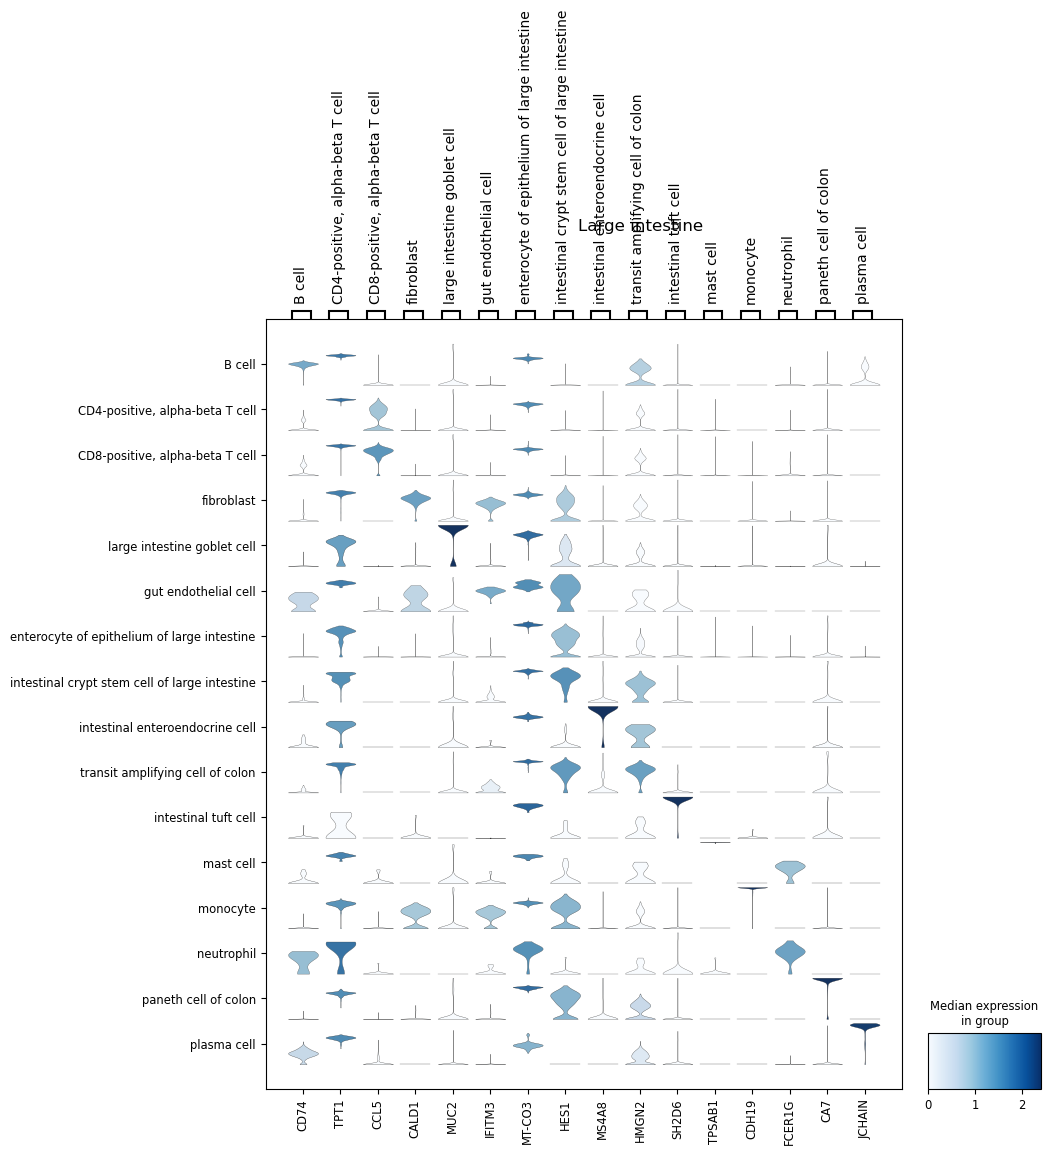

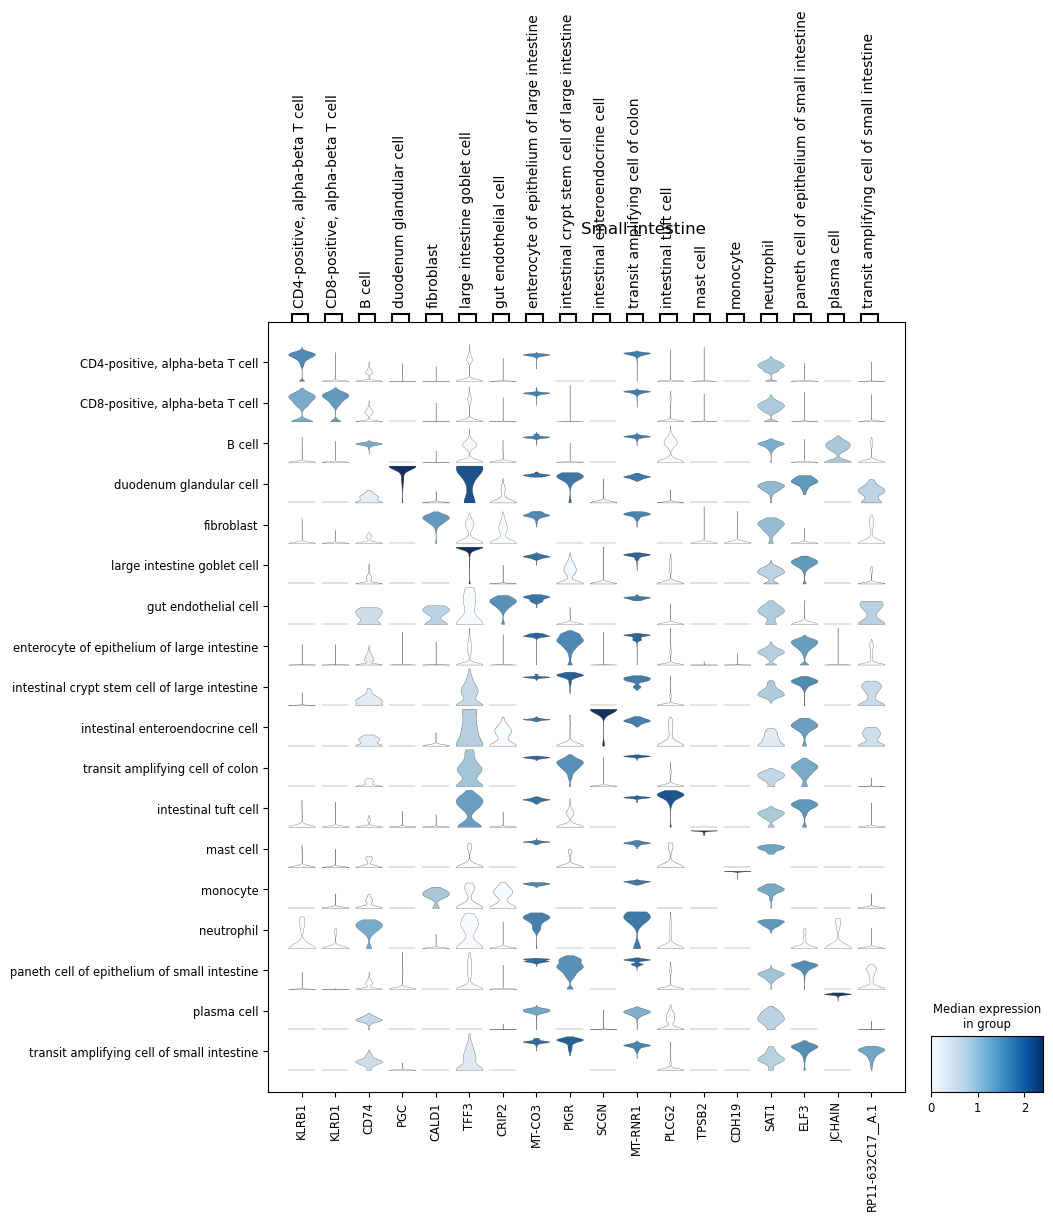

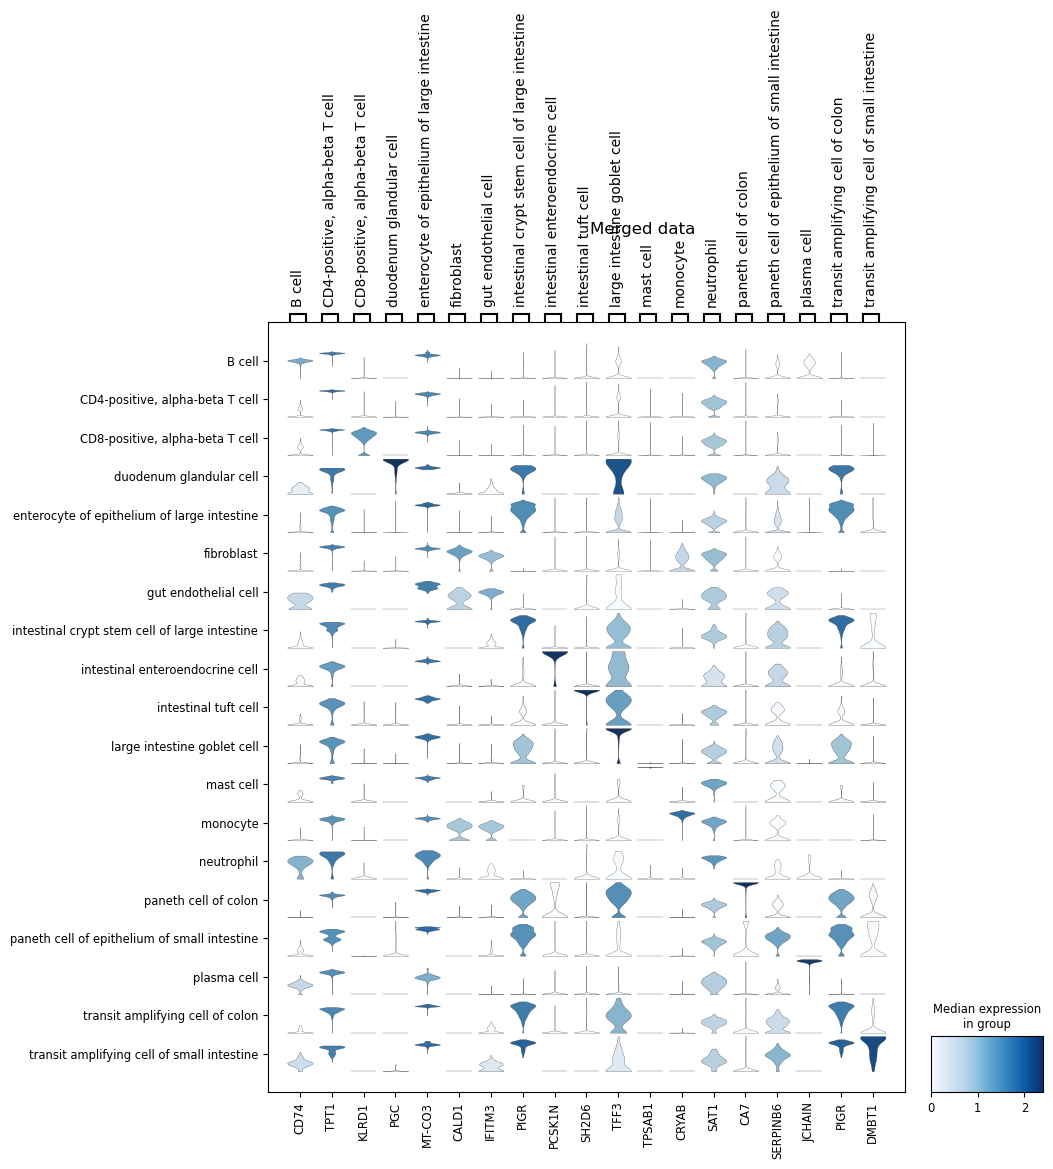

In [29]:
violinAnn(adata, markerDictAdata, 'Large intestine')
violinAnn(adatinha, markerDictAdatinha, 'Small intestine')
violinAnn(merged_adata, markerDictMergedAdata, 'Merged data')